# Multivariate Data Analysis

## Data fields

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

- Id - an Id that represents a (Store, Date) duple within the test set
- Store - a unique Id for each store
- Sales - the turnover for any given day (this is what you are predicting)
- Customers - the number of customers on a given day
- Open - an indicator for whether the store was open: 0 = closed, 1 = open
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
- StoreType - differentiates between 4 different store models: a, b, c, d
- Assortment - describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance - distance in meters to the nearest competitor store
- CompetitionOpenSince\[Month/Year\] - gives the approximate year and month of the time the nearest competitor was opened
- Promo - indicates whether a store is running a promo on that day
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since\[Year/Week\] - describes the year and calendar week when the store started participating in Promo2
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
train_dtypes = {'Store':'object','Sales':'int','Customers':'int',
               'Open':'object', 'Promo':'object', 'StateHoliday':'object', 'SchoolHoliday':'object'}

In [23]:
df_train = pd.read_csv('/home/timbo/Repos/kaggle/rossmann/datasets/train.csv', delimiter=',', dtype=train_dtypes,
                      parse_dates=['DayOfWeek','Date'])

In [24]:
test_dtypes = {'Store':'object','Id':'object','Customers':'int',
               'Open':'object', 'Promo':'object', 'StateHoliday':'object', 'SchoolHoliday':'object'}

In [25]:
df_test = pd.read_csv('/home/timbo/Repos/kaggle/rossmann/datasets/test.csv', ',', dtype=train_dtypes,
                      parse_dates=['DayOfWeek','Date'])

In [26]:
stores_dtypes = {'Store':'object','StoreType':'object','Assortment':'object',
               'CompetitionDistance':'float', 'Promo2':'object', 'PromoInterval':'object'}

In [27]:
df_stores = pd.read_csv('/home/timbo/Repos/kaggle/rossmann/datasets/store.csv', delimiter=',',
                       parse_dates=['CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
                                   'Promo2SinceWeek', 'Promo2SinceYear'], dtype=stores_dtypes)

https://www.kaggle.com/c/rossmann-store-sales/discussion/17313

## Why are there so many 0 sales?

Text(0.5, 1.0, 'Number of zero sales per state holiday')

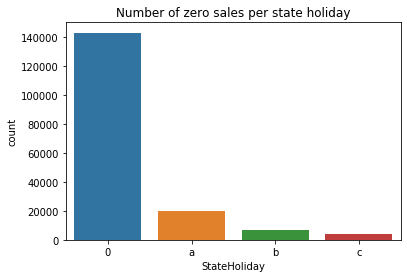

In [28]:
ax = sns.countplot(x="StateHoliday", data=df_train[(df_train['Sales']==0)])
ax.set_title('Number of zero sales per state holiday')

There are also 0 sales on no state holidays => refurbishment and sundays?

Text(0.5, 1.0, 'Number of sales per state holiday')

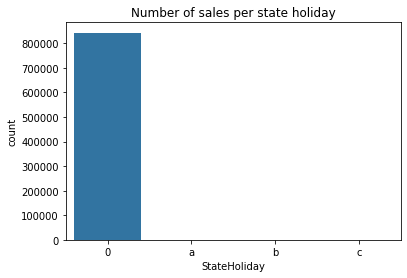

In [29]:
ax = sns.countplot(x="StateHoliday", data=df_train[(df_train['Sales']!=0)])
ax.set_title('Number of sales per state holiday')

On State Holidays there are no sales

Text(0.5, 1.0, 'Number of zero sales per school holiday')

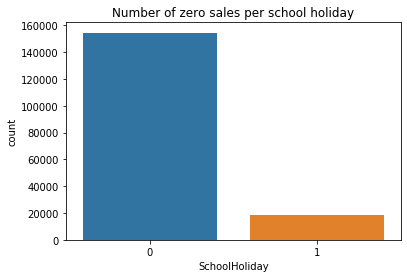

In [30]:
ax = sns.countplot(x="SchoolHoliday", data=df_train[(df_train['Sales']==0)])
ax.set_title('Number of zero sales per school holiday')

Most of the zero sales is when there is no school holiday

Text(0.5, 1.0, 'Number of sales per school holiday')

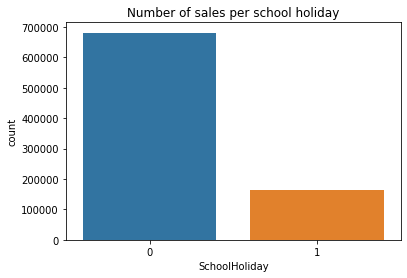

In [31]:
ax = sns.countplot(x="SchoolHoliday", data=df_train[(df_train['Sales']!=0)])
ax.set_title('Number of sales per school holiday')

Most of the non zero sales is when there is no school holiday

Text(0.5, 1.0, 'Number of zero sales per day of week')

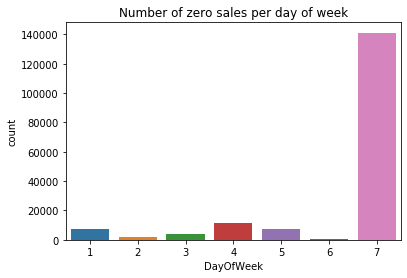

In [32]:
ax = sns.countplot(x="DayOfWeek", data=df_train[(df_train['Sales']==0)])
ax.set_title('Number of zero sales per day of week')

Most of the zero sales are on sundays but some are also during the working days

Text(0.5, 1.0, 'Number of sales per school holiday')

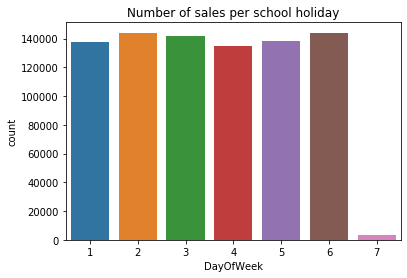

In [33]:
ax = sns.countplot(x="DayOfWeek", data=df_train[(df_train['Sales']!=0)])
ax.set_title('Number of sales per school holiday')

Some none zero sales are even on sundays => Why?

Text(0.5, 1.0, 'Number of zero sales when store was open')

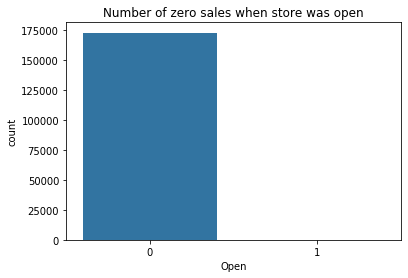

In [34]:
ax = sns.countplot(x="Open", data=df_train[(df_train['Sales']==0)])
ax.set_title('Number of zero sales when store was open')

The zero sales occured only when the store was closed. This makes sense.

Text(0.5, 1.0, 'Number of sales when store was not open')

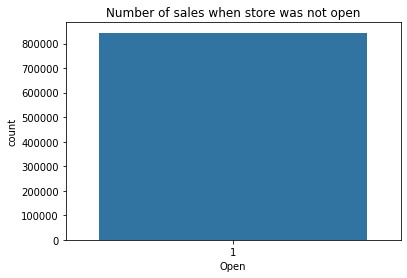

In [35]:
ax = sns.countplot(x="Open", data=df_train[(df_train['Sales']!=0)])
ax.set_title('Number of sales when store was not open')

Sales only happenend when the store was open

### conclusion

The reason for zero sales are closed stores and sundays. But some stores do not have sales during the working days and why are there sales on sundays?

## stores with no sales during the working days

In [36]:
no_sales_df_train = df_train[(df_train['Sales'] == 0) & (df_train['DayOfWeek'] != '7')]

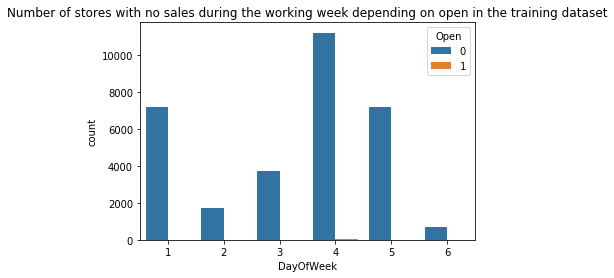

In [37]:
ax = sns.countplot(x='DayOfWeek', hue='Open', data=no_sales_df_train)
ax.set_title('Number of stores with no sales during the working week depending on open in the training dataset')
plt.show()

some stores are open and make no sales

The reason why are many stores have no sales is because they are not open. Why are they not open?

In [38]:
no_sales_df_train = no_sales_df_train[no_sales_df_train['Open'] == '0']

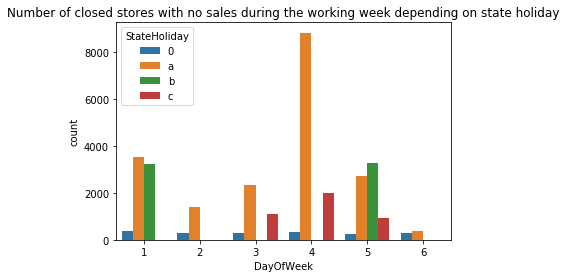

In [39]:
ax = sns.countplot(x='DayOfWeek', hue='StateHoliday', data=no_sales_df_train)
ax.set_title('Number of closed stores with no sales during the working week depending on state holiday')
plt.show()

In [40]:
no_sales_df_train['Store'].unique()

array(['292', '876', '909', ..., '274', '259', '512'], dtype=object)

All of the stores in the training set are closed at least once during the working days. Most of them as a reason of state holidays. But some of them even on regular days.
Christmas has been on Wednesday, Thursday and Friday. Eastern was on Friday and Monday. => Makes sense.

What is the reason for the stores with no sales and no state holiday during the working days?


In [41]:
no_state_holiday_no_sales_df_train = no_sales_df_train[no_sales_df_train['StateHoliday'] == '0']

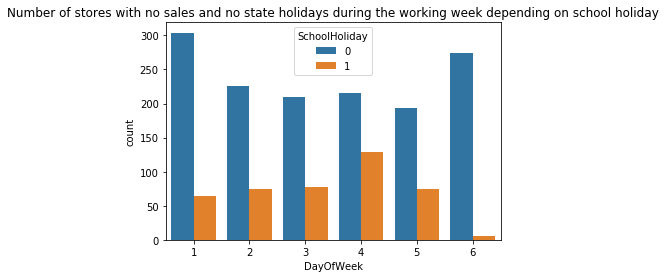

In [42]:
ax = sns.countplot(x='DayOfWeek', hue='SchoolHoliday', data=no_state_holiday_no_sales_df_train)
ax.set_title('Number of stores with no sales and no state holidays during the working week depending on school holiday')
plt.show()

One reason is school holidays

In [43]:
modified_df_train = no_state_holiday_no_sales_df_train[no_state_holiday_no_sales_df_train['SchoolHoliday']=='0']

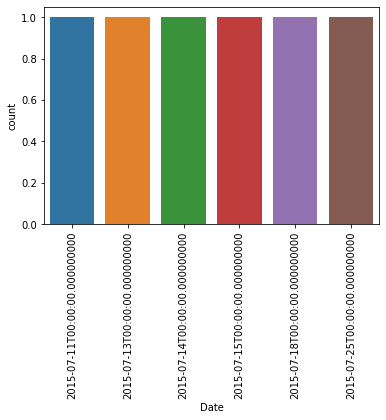

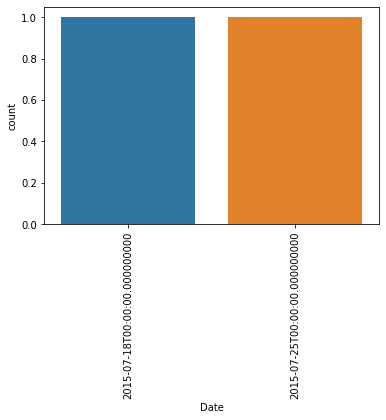

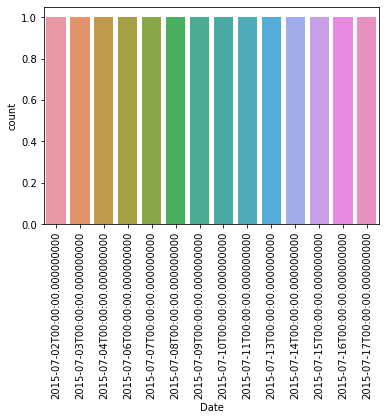

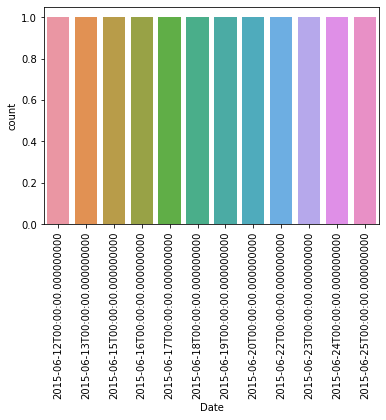

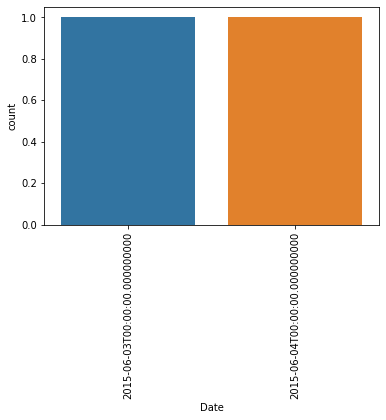

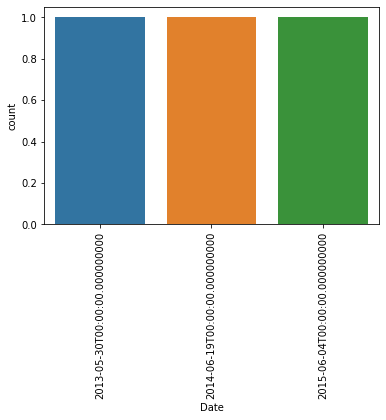

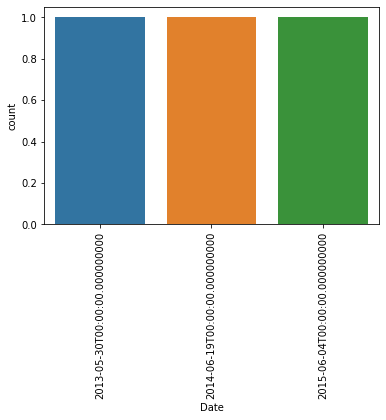

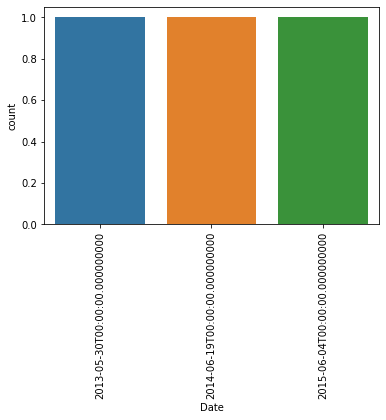

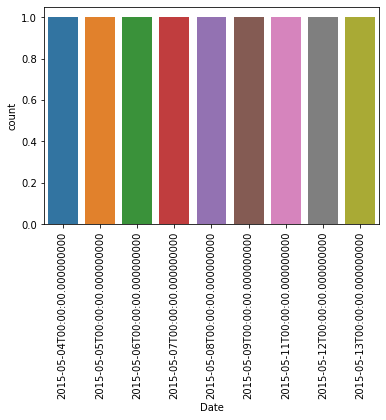

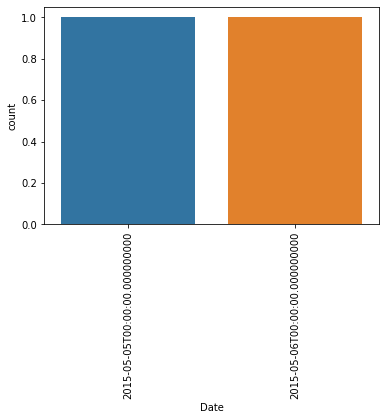

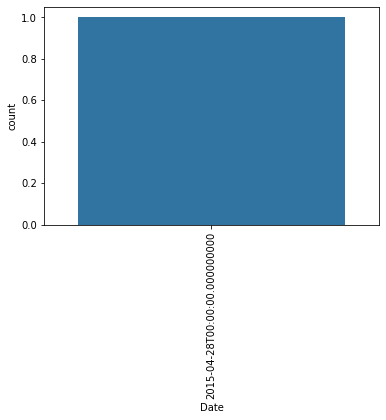

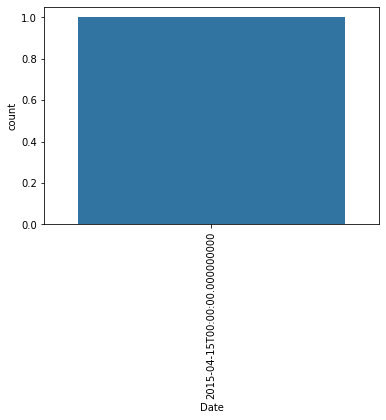

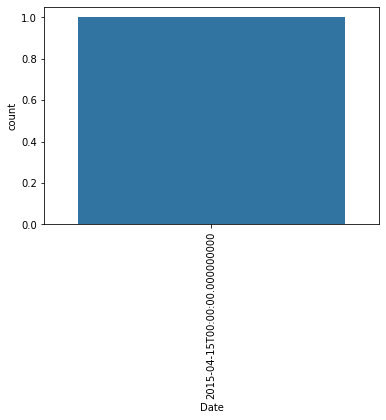

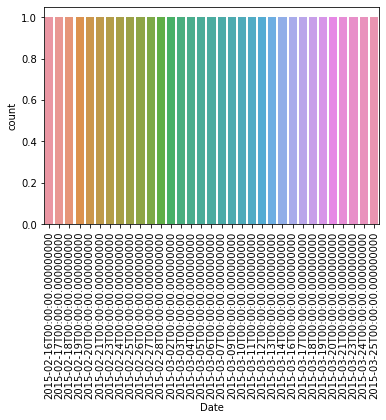

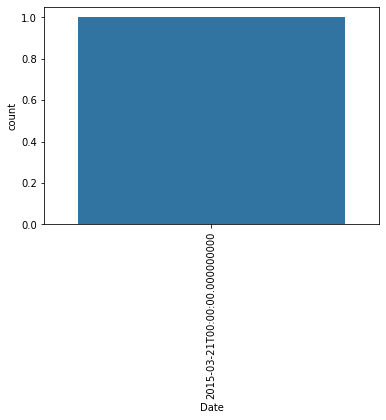

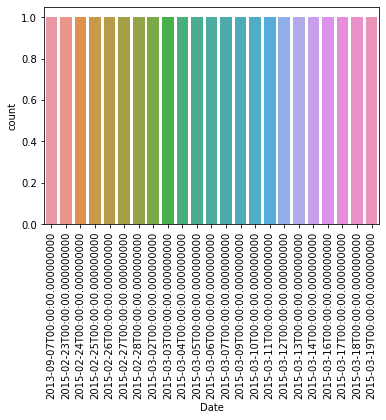

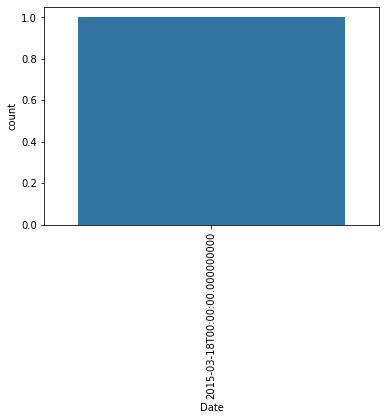

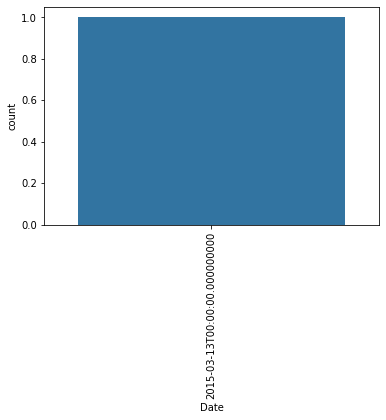

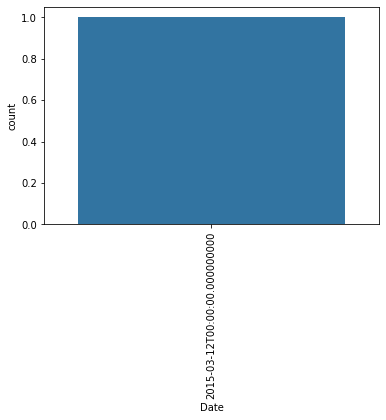

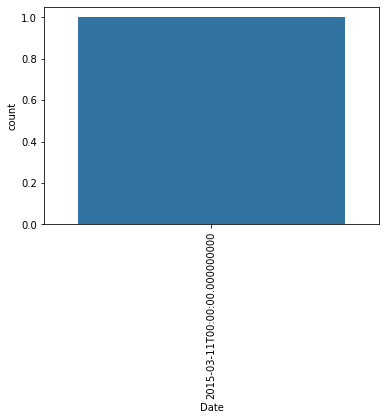

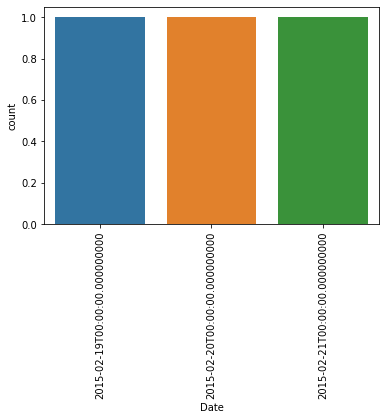

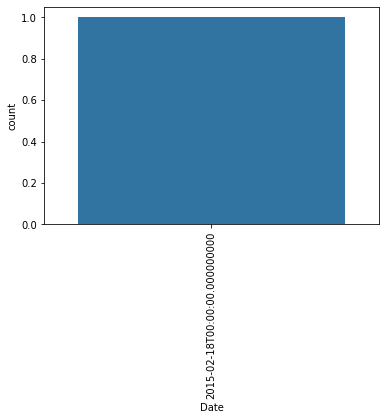

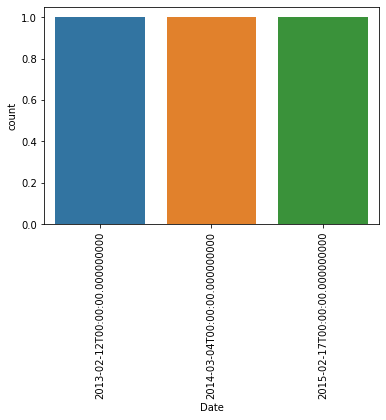

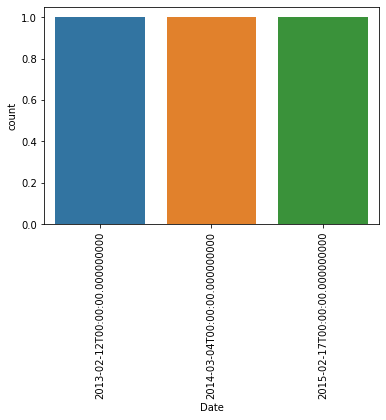

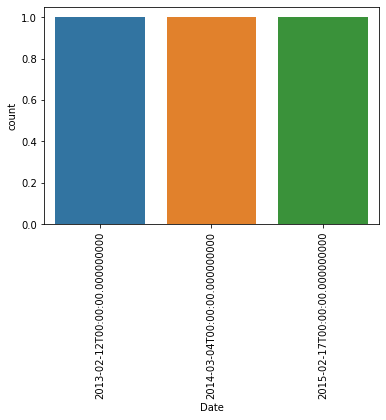

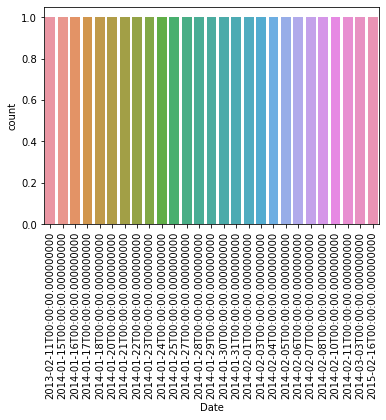

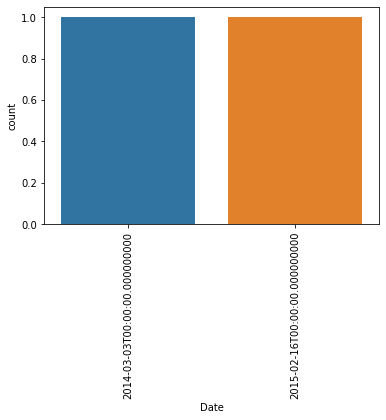

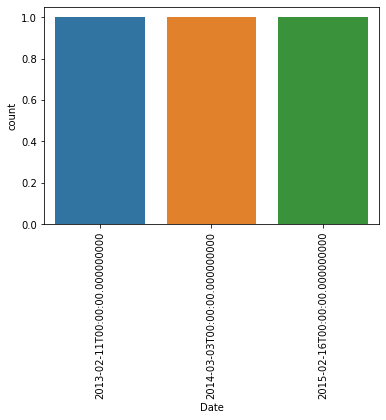

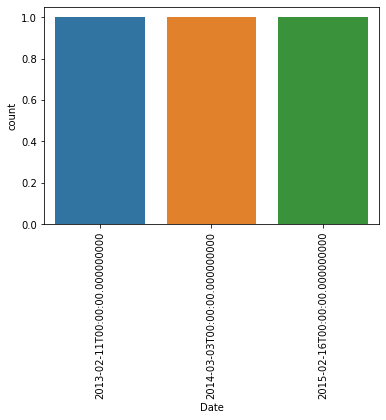

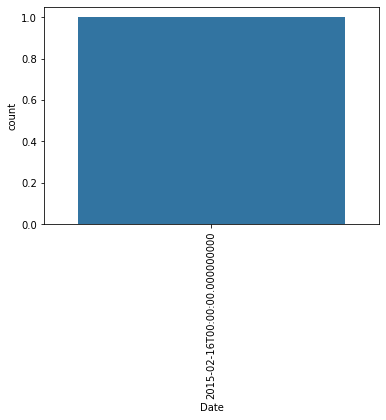

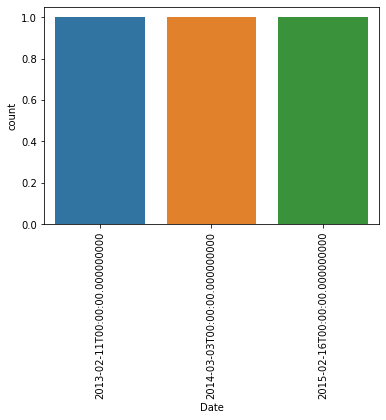

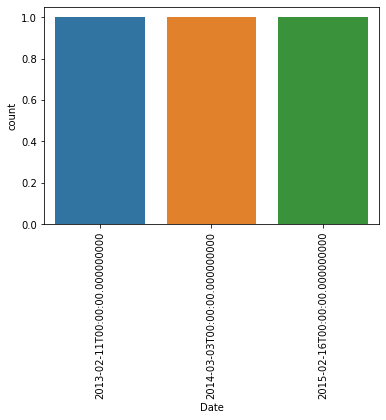

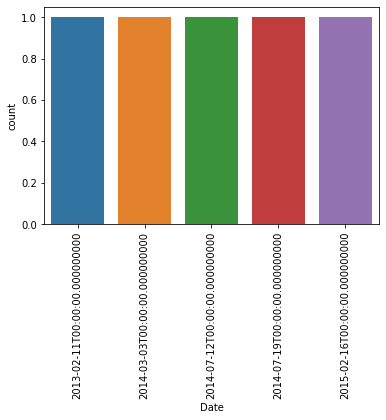

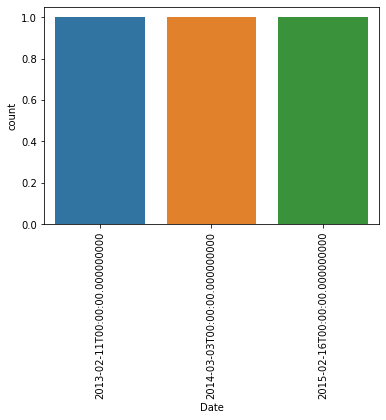

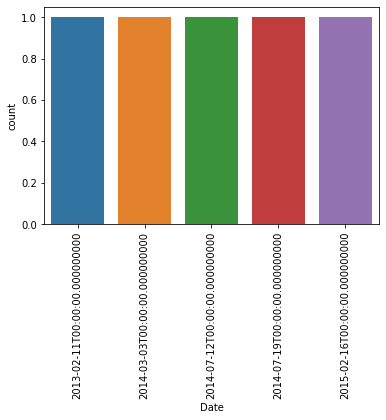

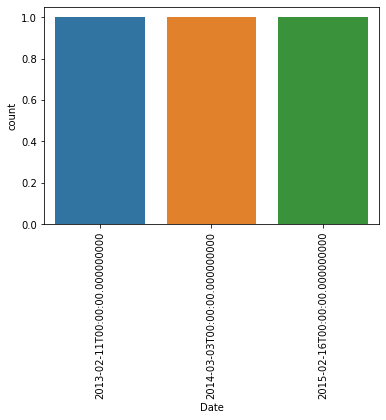

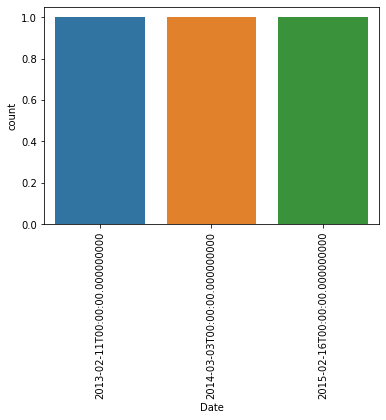

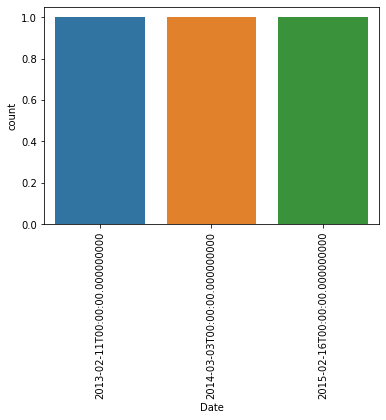

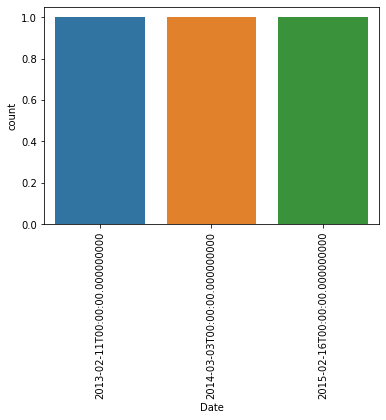

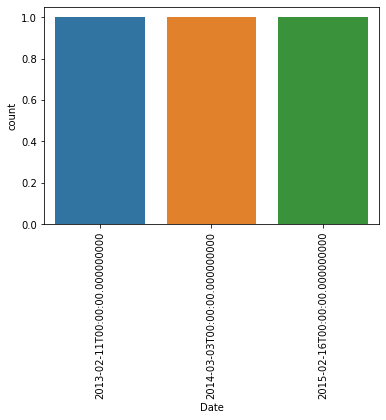

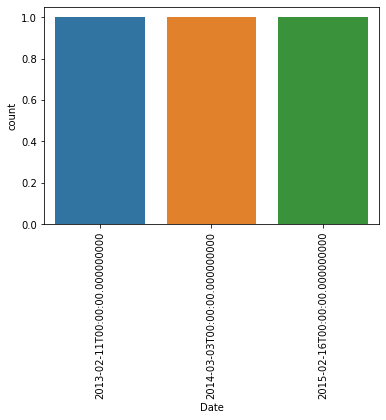

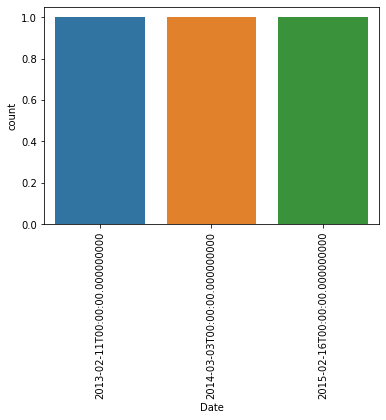

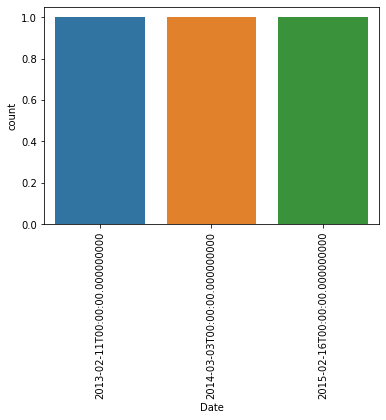

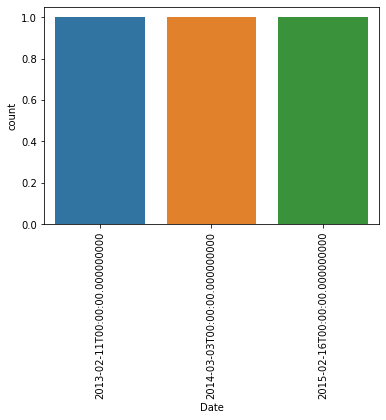

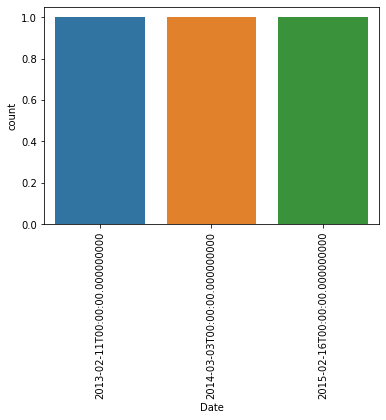

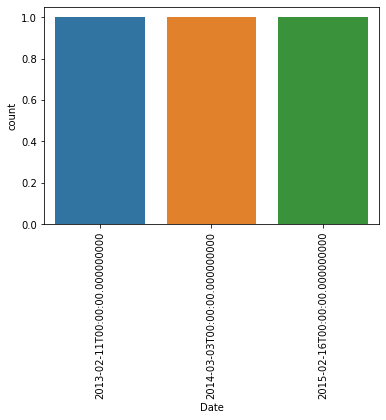

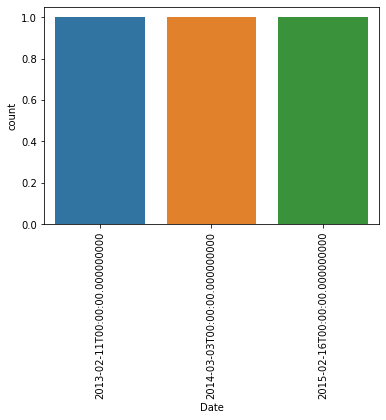

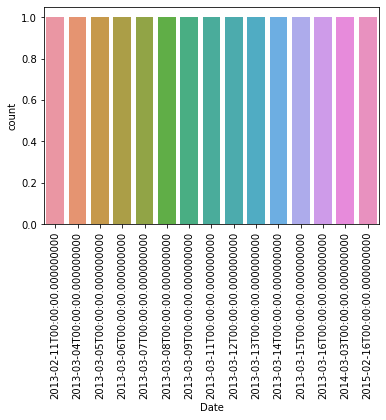

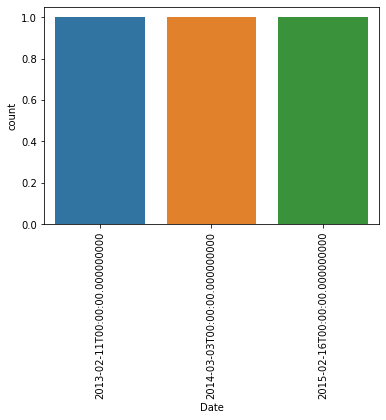

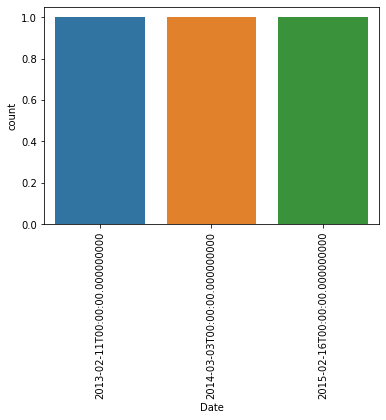

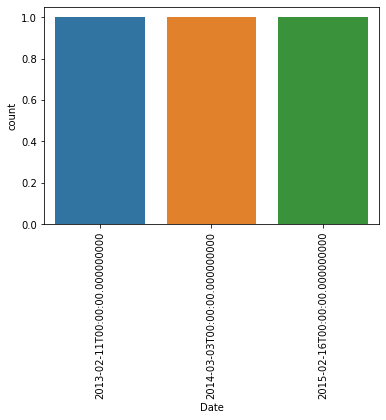

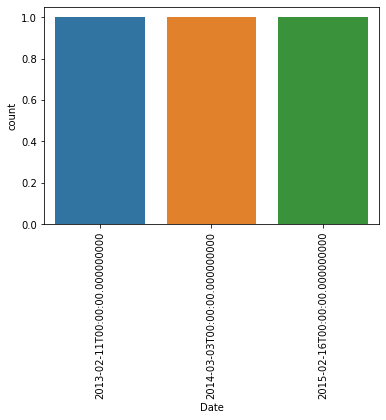

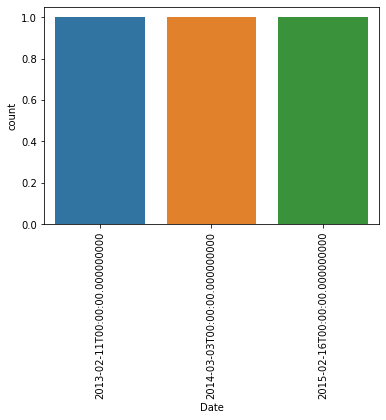

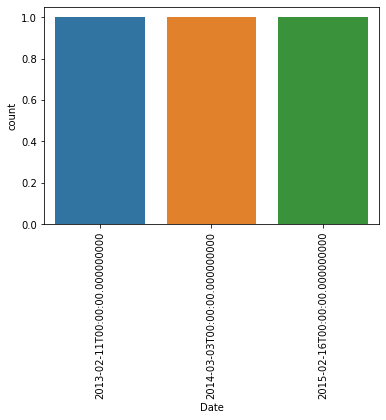

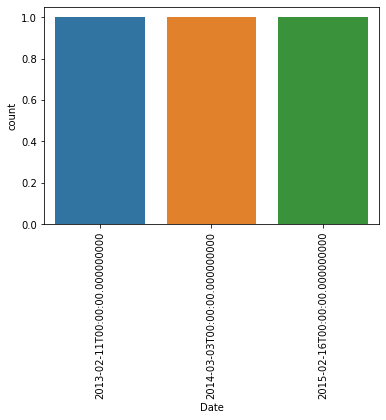

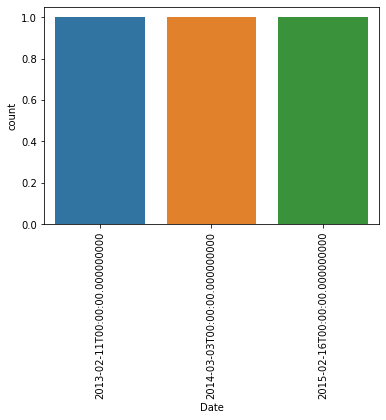

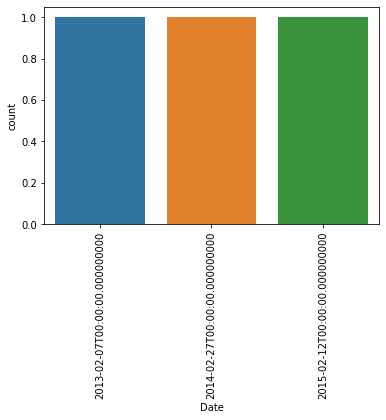

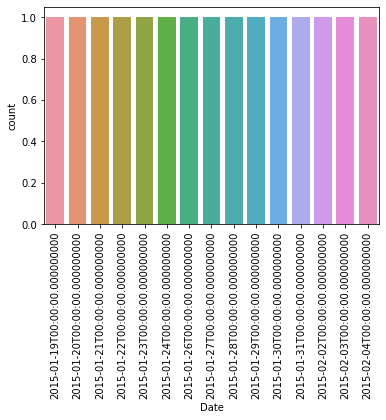

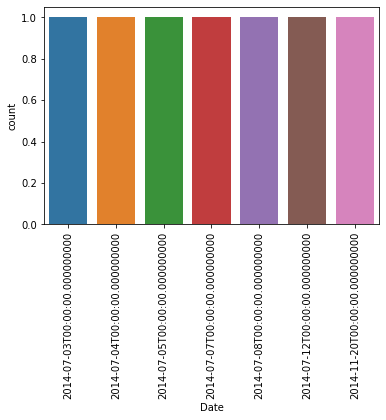

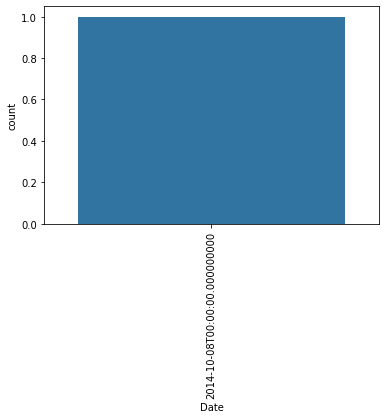

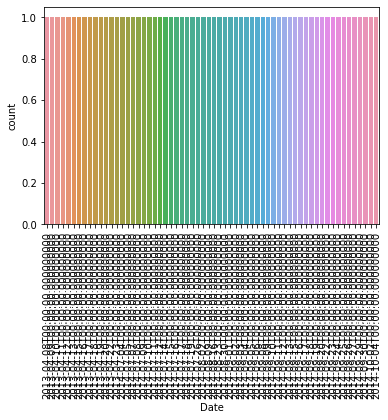

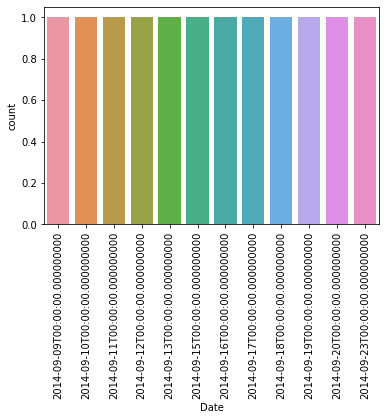

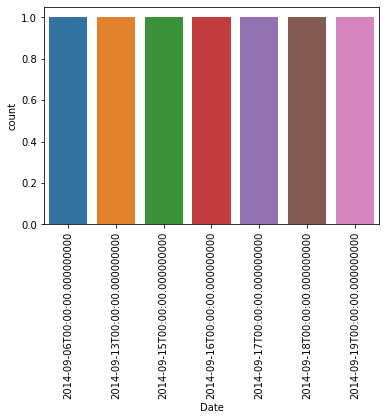

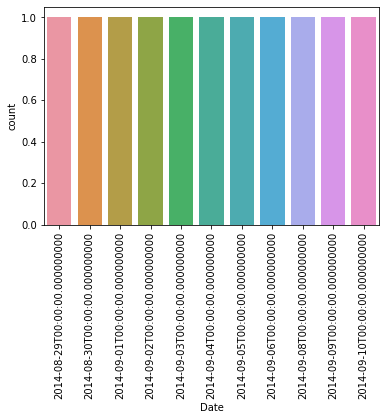

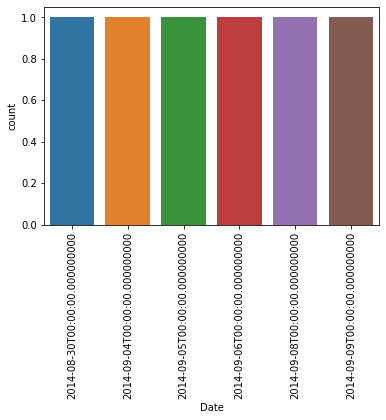

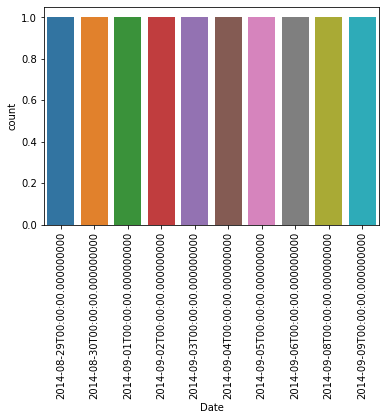

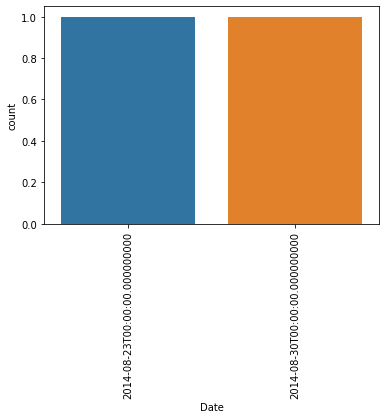

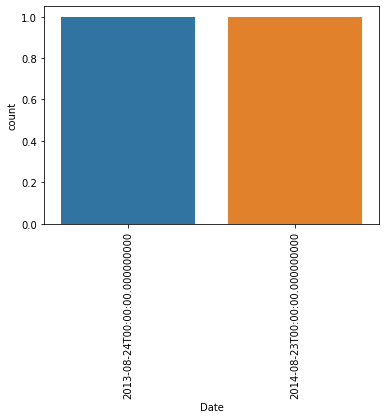

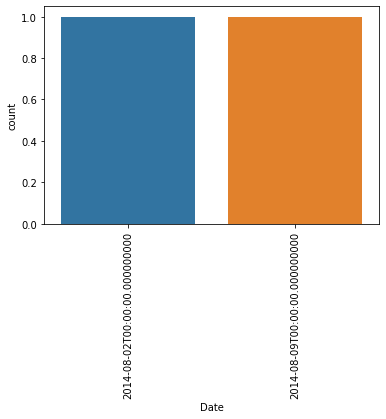

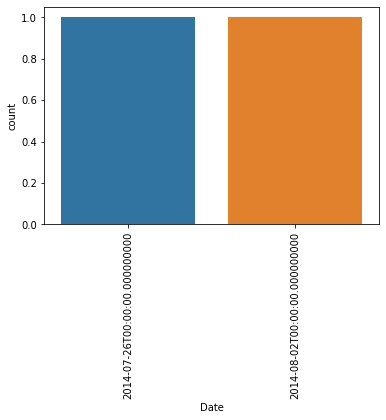

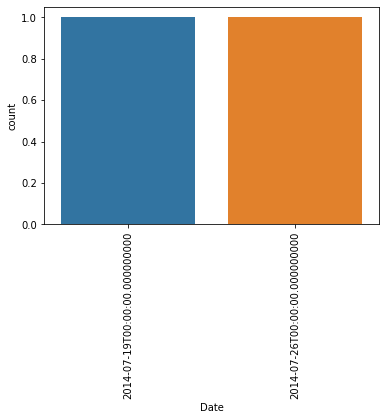

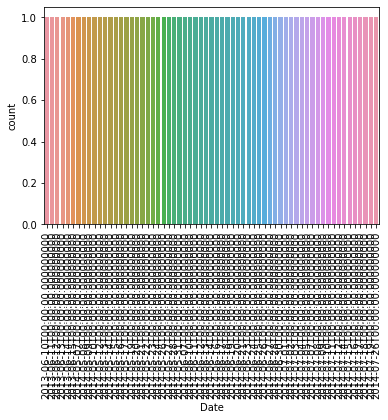

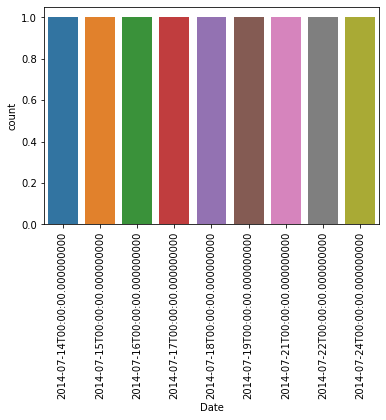

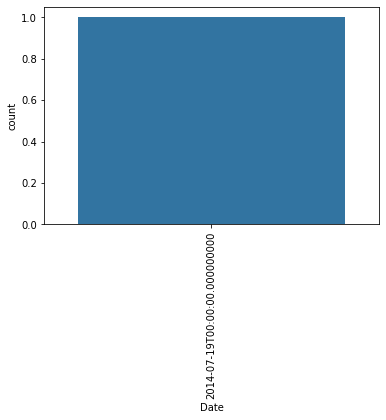

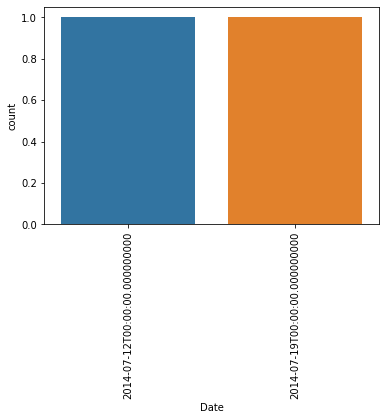

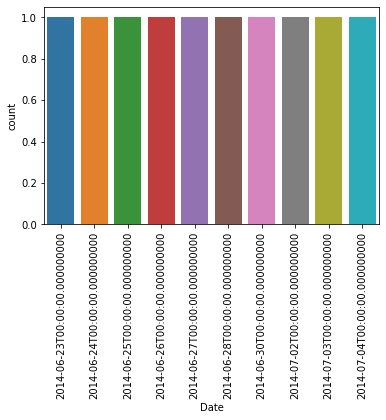

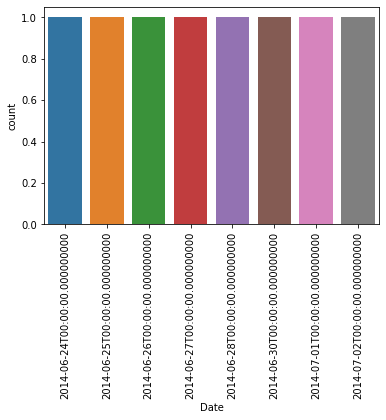

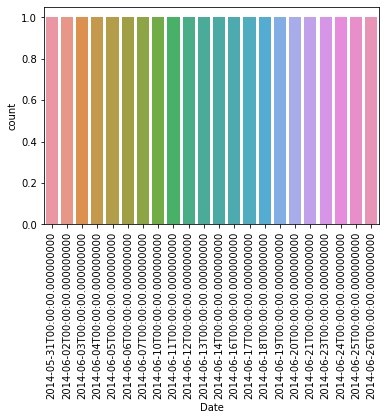

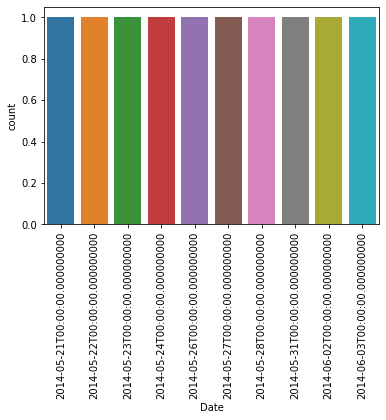

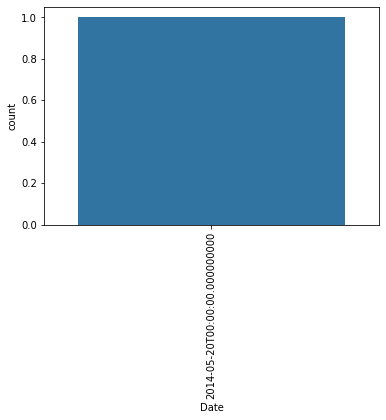

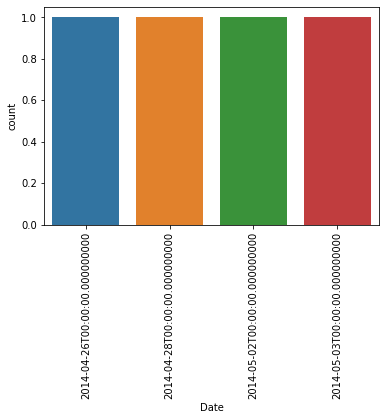

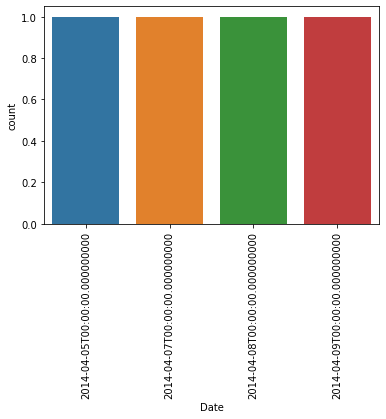

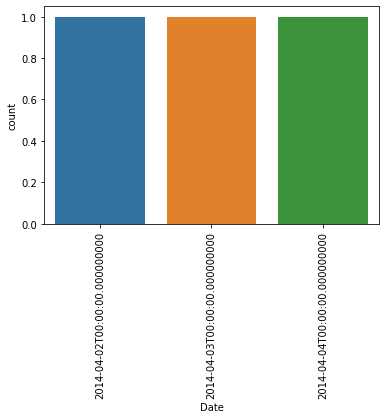

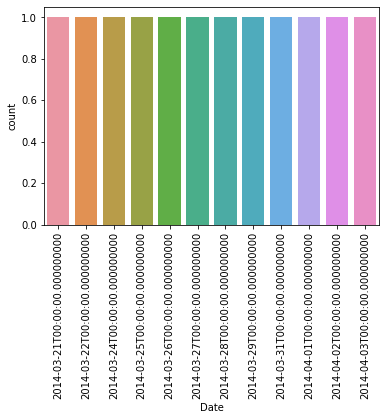

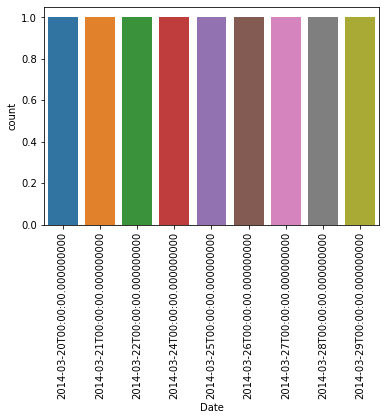

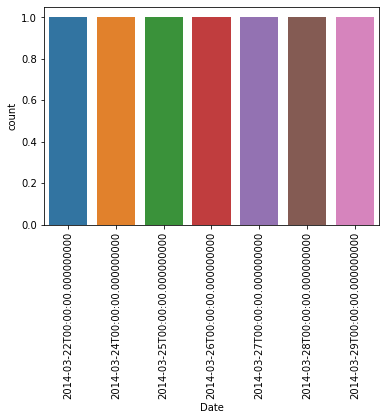

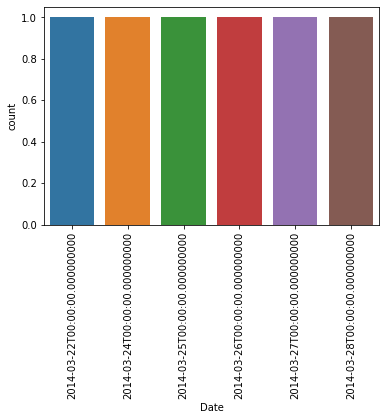

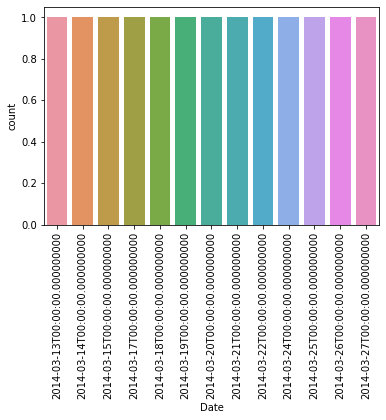

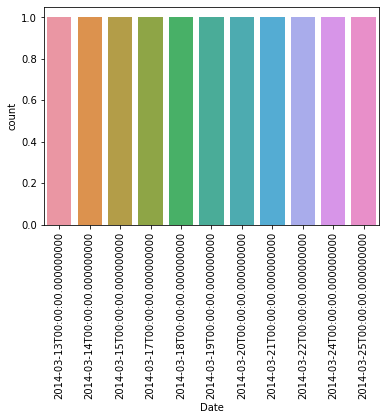

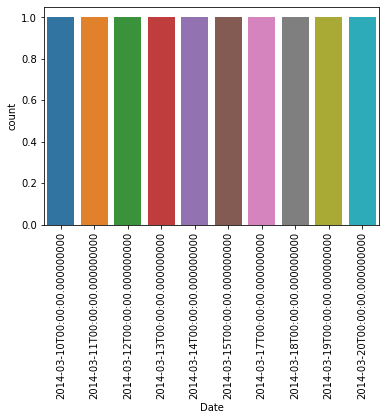

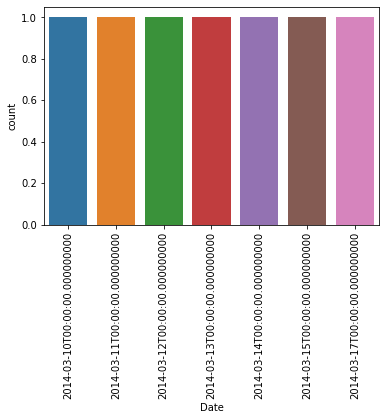

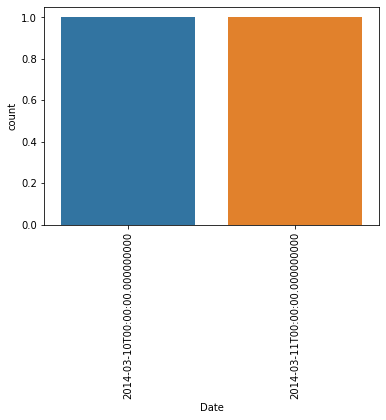

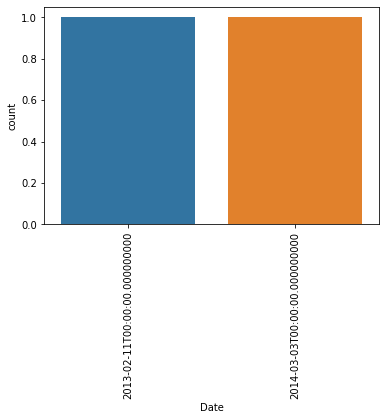

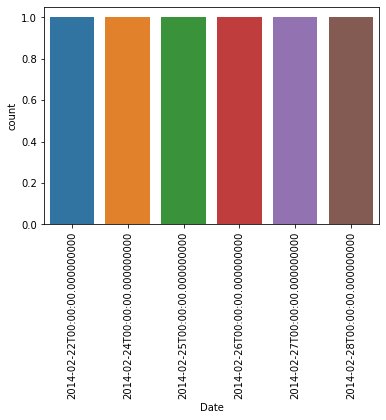

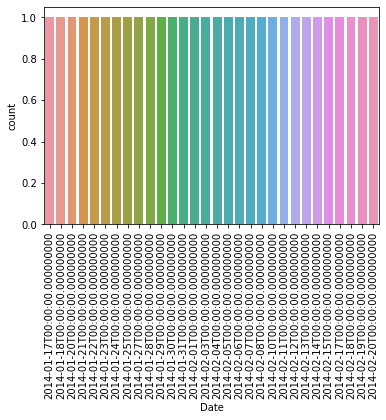

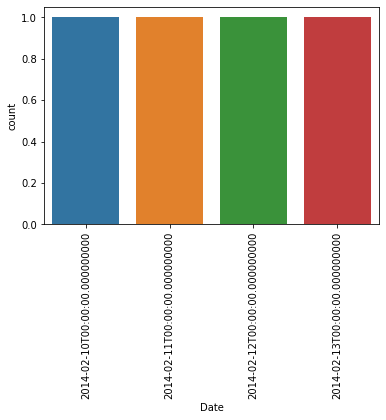

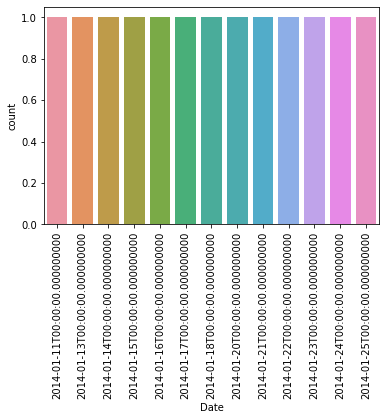

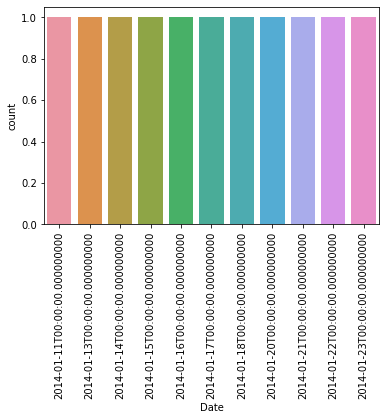

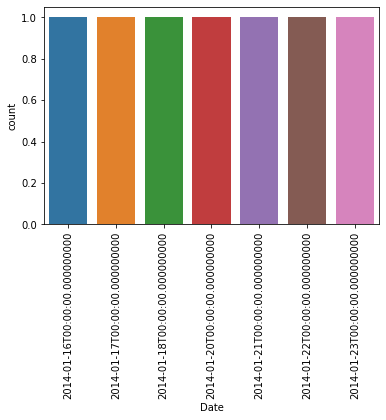

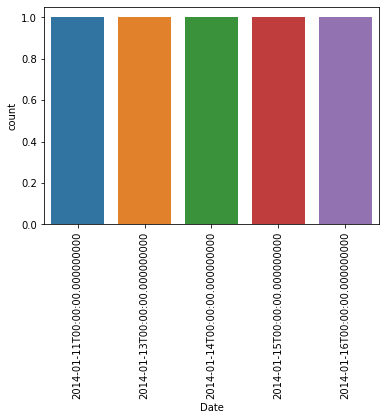

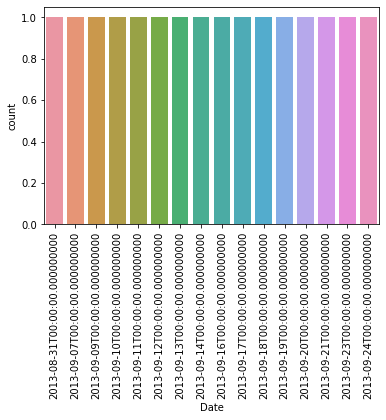

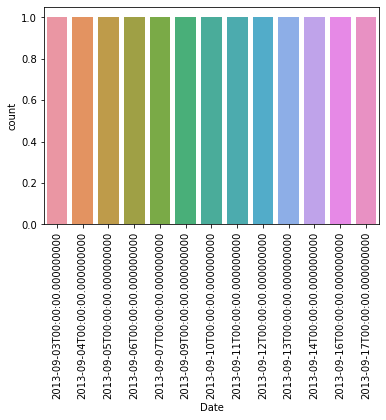

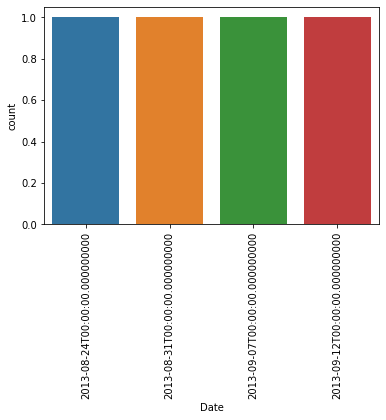

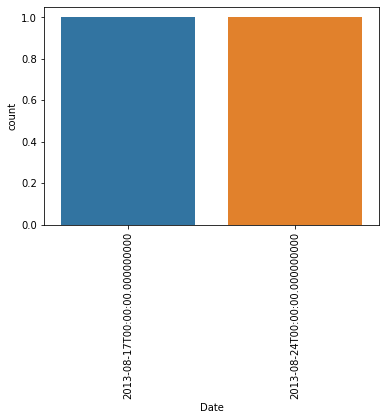

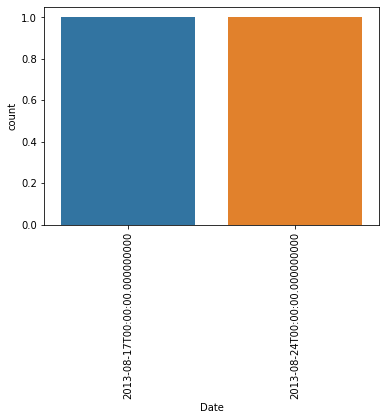

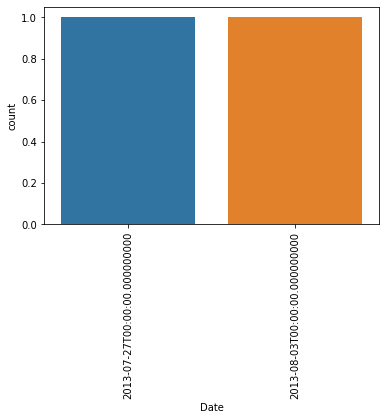

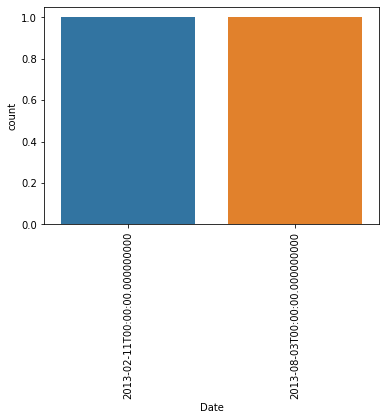

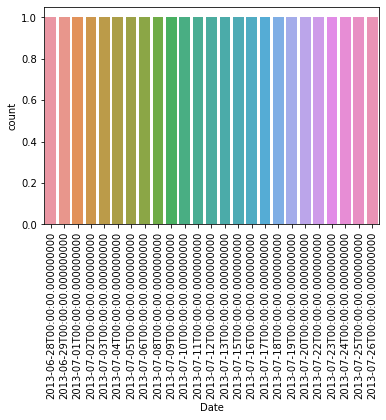

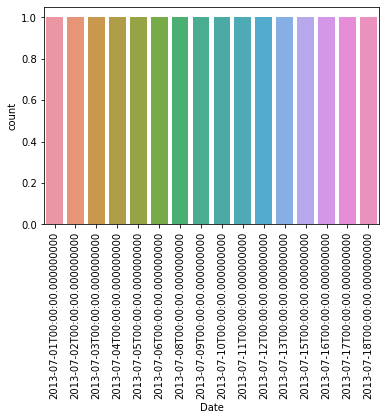

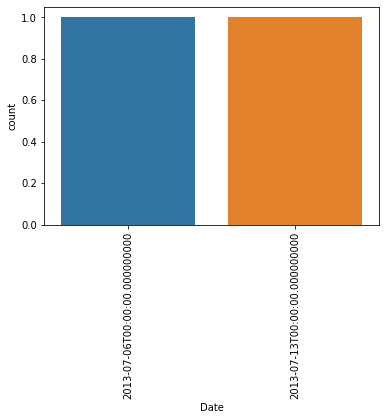

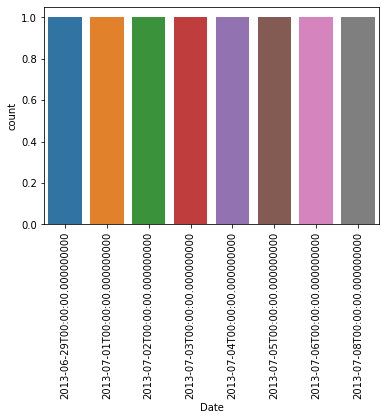

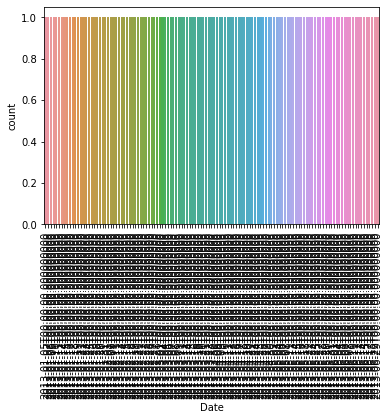

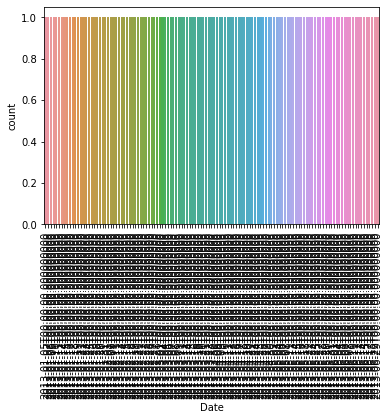

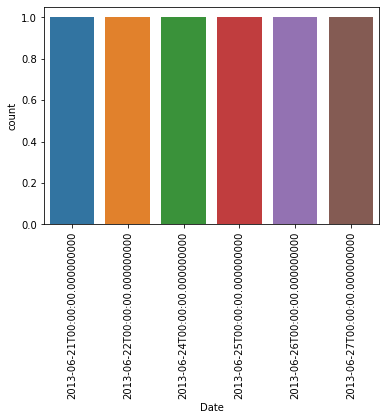

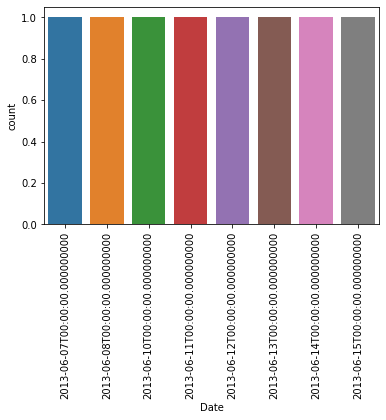

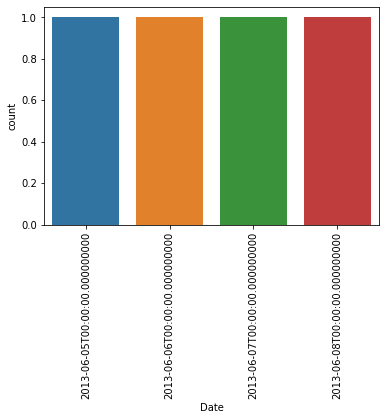

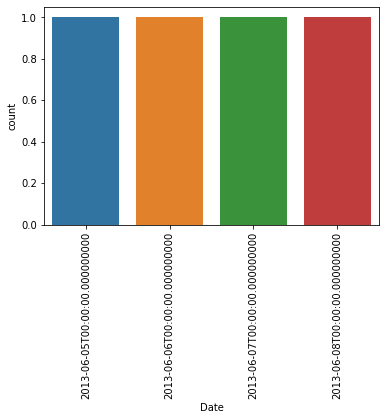

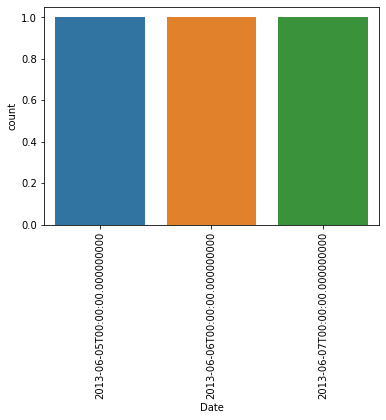

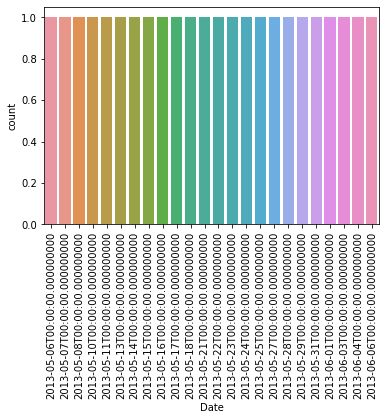

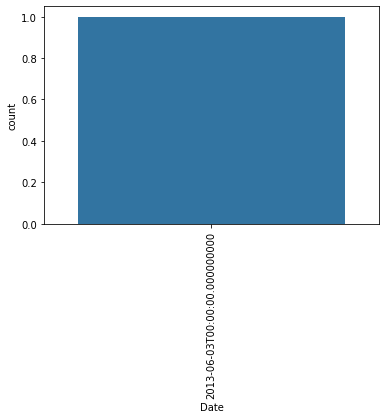

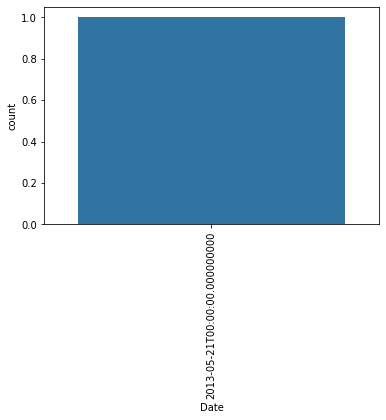

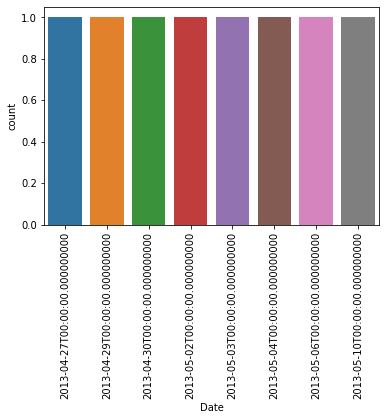

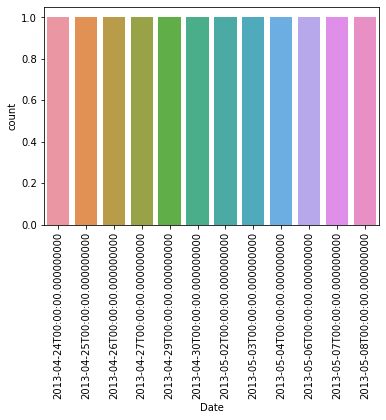

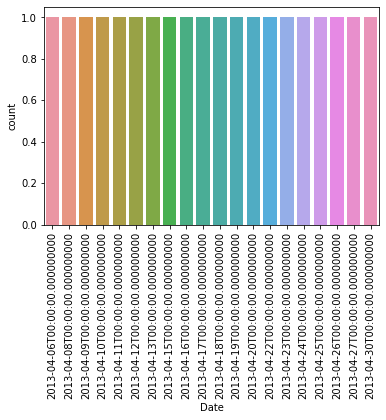

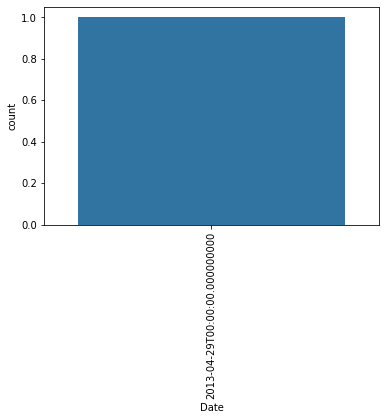

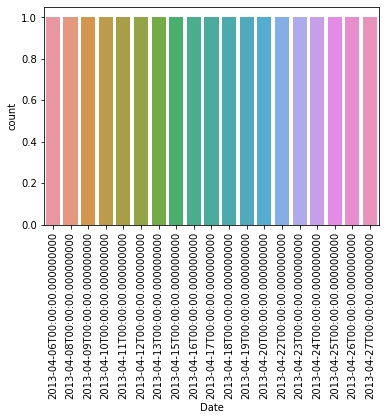

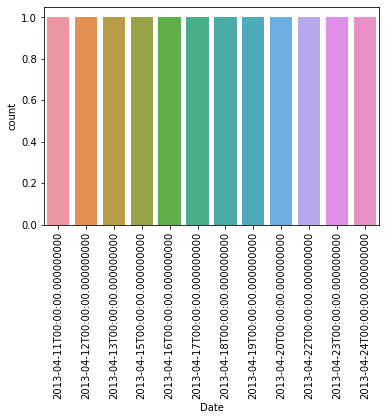

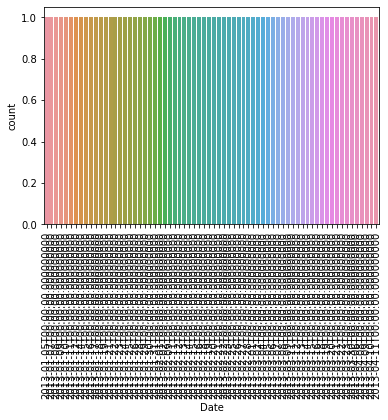

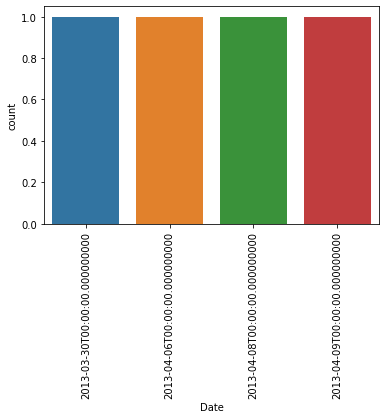

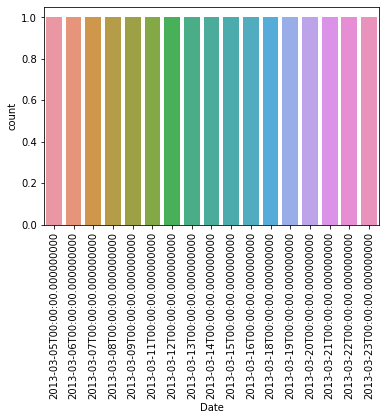

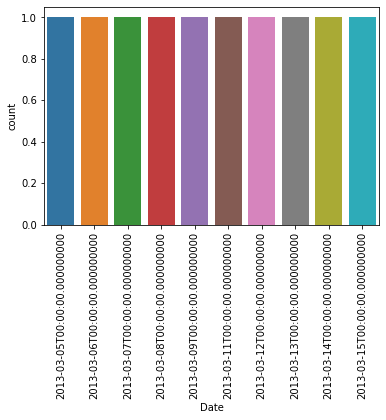

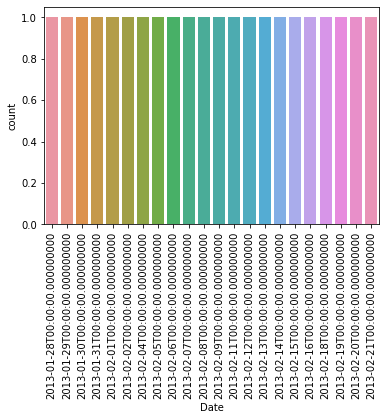

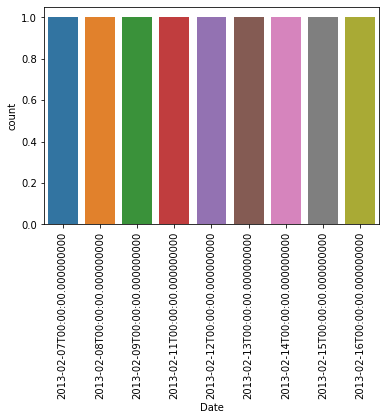

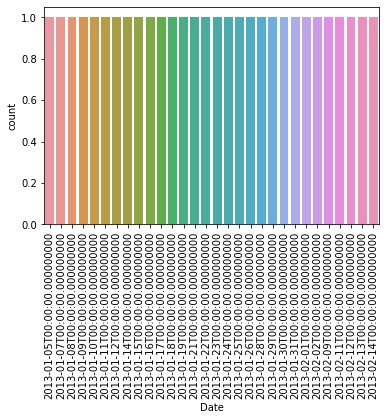

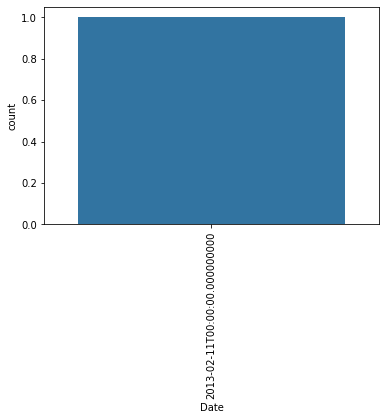

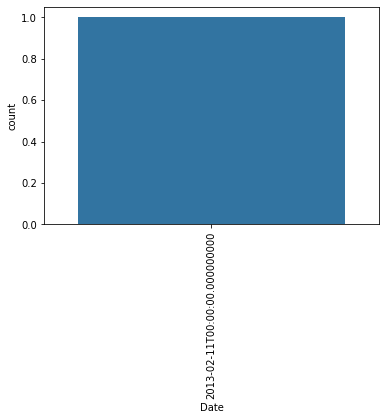

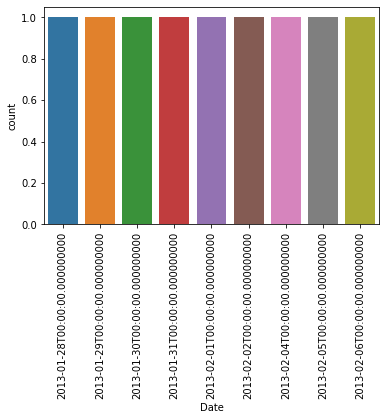

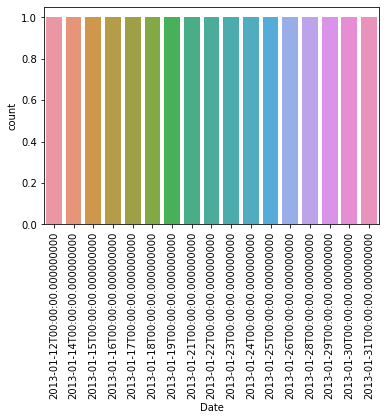

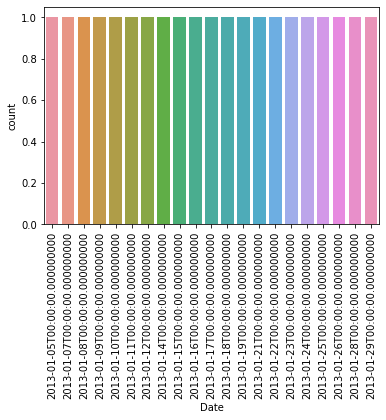

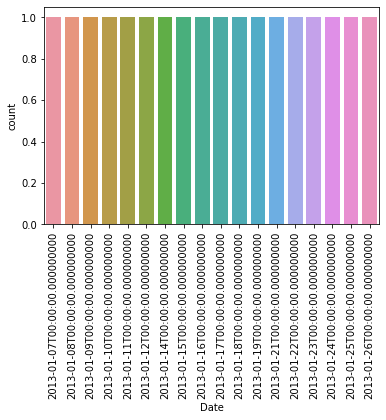

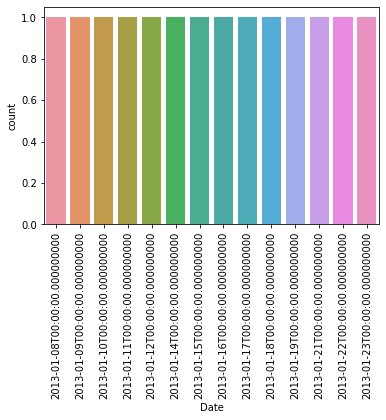

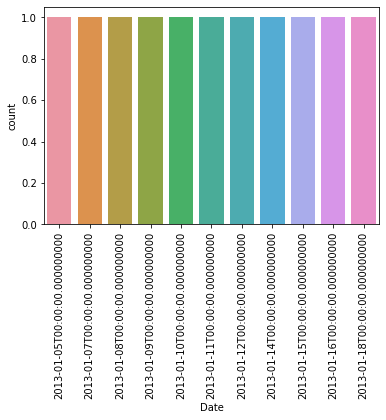

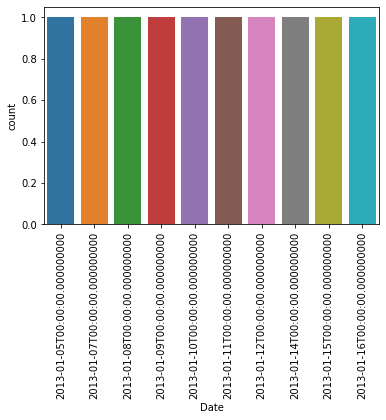

In [44]:
for store in modified_df_train['Store'].unique():
    df = modified_df_train[modified_df_train['Store'] == store]
    ax = sns.countplot(x='Date', data=df)
    # ax.set_title('Number of stores with no sales and no holidays during the working week depending on school holiday')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

Some of the closed stores on working days with no holidays and no sales are successive days (refurbishment) and some on single days

## Sales on sundays?

In [45]:
df_train_sales_sundays = df_train[(df_train['DayOfWeek'] == '7') & (df_train['Sales'] != 0)]

In [46]:
df_train_sales_sundays['Store'].unique()

array(['85', '122', '209', '259', '262', '274', '299', '310', '335',
       '353', '423', '433', '453', '494', '512', '524', '530', '562',
       '578', '676', '682', '732', '733', '769', '863', '867', '931',
       '948', '1045', '1081', '1097', '1099', '877'], dtype=object)

33 stores have sales on sundays

In [47]:
for store in df_train_sales_sundays['Store'].unique():
    df = df_train_sales_sundays[df_train_sales_sundays['Store'] == store]
    print('Store:', store)
    print(df['Date'].sort_values())

Store: 85
1010604   2013-01-06
1002799   2013-01-13
994994    2013-01-20
987189    2013-01-27
979384    2013-02-03
             ...    
36879     2015-06-28
29074     2015-07-05
21269     2015-07-12
13464     2015-07-19
5659      2015-07-26
Name: Date, Length: 134, dtype: datetime64[ns]
Store: 122
940396   2013-03-10
932591   2013-03-17
924786   2013-03-24
916981   2013-03-31
909176   2013-04-07
            ...    
36916    2015-06-28
29111    2015-07-05
21306    2015-07-12
13501    2015-07-19
5696     2015-07-26
Name: Date, Length: 90, dtype: datetime64[ns]
Store: 209
940483   2013-03-10
909263   2013-04-07
901458   2013-04-14
893653   2013-04-21
885848   2013-04-28
            ...    
37003    2015-06-28
29198    2015-07-05
21393    2015-07-12
13588    2015-07-19
5783     2015-07-26
Name: Date, Length: 87, dtype: datetime64[ns]
Store: 259
1010778   2013-01-06
1002973   2013-01-13
995168    2013-01-20
987363    2013-01-27
971753    2013-02-10
             ...    
37053     2015-06-28


Some stores open only once or twice a month on sunday and a lot of the stores open on every sunday. These are stores in train stations for example.

## Open stores with no sales

In [48]:
open_no_sales_df_train = df_train[(df_train['Open'] == '1') & (df_train['Sales'] == 0)]

In [49]:
open_no_sales_df_train.head()

Store DayOfWeek       Date  Sales  Customers Open Promo StateHoliday  \
86825    971         5 2015-05-15      0          0    1     0            0   
142278   674         4 2015-03-26      0          0    1     0            0   
196938   699         4 2015-02-05      0          0    1     1            0   
322053   708         3 2014-10-01      0          0    1     1            0   
330176   357         1 2014-09-22      0          0    1     0            0   

       SchoolHoliday  
86825              1  
142278             0  
196938             0  
322053             0  
330176             0

In [50]:
open_no_sales_df_train['Store'].unique()

array(['971', '674', '699', '708', '357', '227', '835', '548', '28',
       '102', '238', '303', '387', '882', '887', '925', '57', '1017',
       '1100', '661', '850', '986', '327', '25', '623', '983', '663',
       '391', '927', '1039', '665', '700', '681', '364', '589', '948',
       '353', '259', '339', '232', '762'], dtype=object)

41 stores have been open but did not make any sales

In [51]:
open_no_sales_df_train['Date'].value_counts().sort_index()

2013-01-17    1
2013-01-24    1
2013-01-30    1
2013-01-31    1
2013-02-07    1
2013-03-16    1
2013-04-25    1
2013-04-29    1
2013-05-07    1
2013-05-08    1
2013-05-10    1
2013-06-05    1
2013-06-28    1
2013-06-29    1
2013-07-09    1
2013-07-10    1
2013-08-08    1
2013-08-28    1
2013-09-02    1
2014-01-17    1
2014-01-18    1
2014-01-24    1
2014-01-25    1
2014-02-12    1
2014-02-13    1
2014-03-12    1
2014-03-18    1
2014-03-29    1
2014-04-04    1
2014-04-29    1
2014-04-30    1
2014-06-04    1
2014-06-05    1
2014-07-01    1
2014-07-03    1
2014-07-12    1
2014-07-23    2
2014-07-24    4
2014-09-02    1
2014-09-03    1
2014-09-04    1
2014-09-05    1
2014-09-10    1
2014-09-11    2
2014-09-22    1
2014-10-01    1
2015-02-05    1
2015-03-26    1
2015-05-15    1
Name: Date, dtype: int64

In [52]:
pd.crosstab(open_no_sales_df_train['Date'],open_no_sales_df_train['SchoolHoliday'], margins=True, margins_name="Total")

SchoolHoliday         0   1  Total
Date                              
2013-01-17 00:00:00   1   0      1
2013-01-24 00:00:00   1   0      1
2013-01-30 00:00:00   1   0      1
2013-01-31 00:00:00   1   0      1
2013-02-07 00:00:00   1   0      1
2013-03-16 00:00:00   1   0      1
2013-04-25 00:00:00   1   0      1
2013-04-29 00:00:00   1   0      1
2013-05-07 00:00:00   1   0      1
2013-05-08 00:00:00   1   0      1
2013-05-10 00:00:00   1   0      1
2013-06-05 00:00:00   1   0      1
2013-06-28 00:00:00   1   0      1
2013-06-29 00:00:00   1   0      1
2013-07-09 00:00:00   1   0      1
2013-07-10 00:00:00   1   0      1
2013-08-08 00:00:00   0   1      1
2013-08-28 00:00:00   0   1      1
2013-09-02 00:00:00   0   1      1
2014-01-17 00:00:00   1   0      1
2014-01-18 00:00:00   1   0      1
2014-01-24 00:00:00   1   0      1
2014-01-25 00:00:00   1   0      1
2014-02-12 00:00:00   1   0      1
2014-02-13 00:00:00   1   0      1
2014-03-12 00:00:00   1   0      1
2014-03-18 00:00:00   1   0      1
2014-03-29 00:00:00   1   0      1
2014-04-04 00:00:00   1   0      1
2014-04-29 00:00:00   1   0      1
2014-04-30 00:00:00   1   0      1
2014-06-04 00:00:00   1   0      1
2014-06-05 00:00:00   1   0      1
2014-07-01 00:00:00   1   0      1
2014-07-03 00:00:00   1   0      1
2014-07-12 00:00:00   1   0      1
2014-07-23 00:00:00   1   1      2
2014-07-24 00:00:00   0   4      4
2014-09-02 00:00:00   0   1      1
2014-09-03 00:00:00   0   1      1
2014-09-04 00:00:00   1   0      1
2014-09-05 00:00:00   0   1      1
2014-09-10 00:00:00   1   0      1
2014-09-11 00:00:00   2   0      2
2014-09-22 00:00:00   1   0      1
2014-10-01 00:00:00   1   0      1
2015-02-05 00:00:00   1   0      1
2015-03-26 00:00:00   1   0      1
2015-05-15 00:00:00   0   1      1
Total                42  12     54

In [53]:
pd.crosstab(open_no_sales_df_train['Date'],open_no_sales_df_train['Customers'], margins=True, margins_name="Total")

Customers             0  3  5  Total
Date                                
2013-01-17 00:00:00   1  0  0      1
2013-01-24 00:00:00   1  0  0      1
2013-01-30 00:00:00   1  0  0      1
2013-01-31 00:00:00   1  0  0      1
2013-02-07 00:00:00   1  0  0      1
2013-03-16 00:00:00   1  0  0      1
2013-04-25 00:00:00   0  0  1      1
2013-04-29 00:00:00   1  0  0      1
2013-05-07 00:00:00   1  0  0      1
2013-05-08 00:00:00   1  0  0      1
2013-05-10 00:00:00   1  0  0      1
2013-06-05 00:00:00   1  0  0      1
2013-06-28 00:00:00   1  0  0      1
2013-06-29 00:00:00   1  0  0      1
2013-07-09 00:00:00   1  0  0      1
2013-07-10 00:00:00   1  0  0      1
2013-08-08 00:00:00   1  0  0      1
2013-08-28 00:00:00   1  0  0      1
2013-09-02 00:00:00   1  0  0      1
2014-01-17 00:00:00   1  0  0      1
2014-01-18 00:00:00   1  0  0      1
2014-01-24 00:00:00   1  0  0      1
2014-01-25 00:00:00   1  0  0      1
2014-02-12 00:00:00   1  0  0      1
2014-02-13 00:00:00   1  0  0      1
2014-03-12 00:00:00   1  0  0      1
2014-03-18 00:00:00   1  0  0      1
2014-03-29 00:00:00   1  0  0      1
2014-04-04 00:00:00   1  0  0      1
2014-04-29 00:00:00   0  1  0      1
2014-04-30 00:00:00   1  0  0      1
2014-06-04 00:00:00   1  0  0      1
2014-06-05 00:00:00   1  0  0      1
2014-07-01 00:00:00   1  0  0      1
2014-07-03 00:00:00   1  0  0      1
2014-07-12 00:00:00   1  0  0      1
2014-07-23 00:00:00   2  0  0      2
2014-07-24 00:00:00   4  0  0      4
2014-09-02 00:00:00   1  0  0      1
2014-09-03 00:00:00   1  0  0      1
2014-09-04 00:00:00   1  0  0      1
2014-09-05 00:00:00   1  0  0      1
2014-09-10 00:00:00   1  0  0      1
2014-09-11 00:00:00   2  0  0      2
2014-09-22 00:00:00   1  0  0      1
2014-10-01 00:00:00   1  0  0      1
2015-02-05 00:00:00   1  0  0      1
2015-03-26 00:00:00   1  0  0      1
2015-05-15 00:00:00   1  0  0      1
Total                52  1  1     54

In [54]:
pd.crosstab(open_no_sales_df_train['Date'],open_no_sales_df_train['Store'], margins=True, margins_name="Total")

Store                1017  102  1039  1100  227  232  238  25  259  28  ...  \
Date                                                                    ...   
2013-01-17 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-01-24 00:00:00     0    0     0     0    0    1    0   0    0   0  ...   
2013-01-30 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-01-31 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-02-07 00:00:00     0    0     0     0    0    0    0   0    1   0  ...   
2013-03-16 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-04-25 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-04-29 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-05-07 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-05-08 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-05-10 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-06-05 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-06-28 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-06-29 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-07-09 00:00:00     0    0     1     0    0    0    0   0    0   0  ...   
2013-07-10 00:00:00     0    0     1     0    0    0    0   0    0   0  ...   
2013-08-08 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-08-28 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-09-02 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-01-17 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-01-18 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-01-24 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-01-25 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-02-12 00:00:00     0    0     0     0    0    0    0   1    0   0  ...   
2014-02-13 00:00:00     0    0     0     0    0    0    0   1    0   0  ...   
2014-03-12 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-03-18 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-03-29 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-04-04 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-04-29 00:00:00     0    0     0     1    0    0    0   0    0   0  ...   
2014-04-30 00:00:00     0    0     0     1    0    0    0   0    0   0  ...   
2014-06-04 00:00:00     1    0     0     0    0    0    0   0    0   0  ...   
2014-06-05 00:00:00     1    0     0     0    0    0    0   0    0   0  ...   
2014-07-01 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-07-03 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-07-12 00:00:00     0    1     0     0    0    0    0   0    0   0  ...   
2014-07-23 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-07-24 00:00:00     0    1     0     0    0    0    1   0    0   0  ...   
2014-09-02 00:00:00     0    0     0     0    0    0    0   0    0   1  ...   
2014-09-03 00:00:00     0    0     0     0    0    0    0   0    0   1  ...   
2014-09-04 00:00:00     0    0     0     0    0    0    0   0    0   1  ...   
2014-09-05 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-09-10 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-09-11 00:00:00     0    0     0     0    1    0    0   0    0   0  ...   
2014-09-22 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-10-01 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2015-02-05 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2015-03-26 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2015-05-15 00:00:00     0    0     0     0    0   

Open stores with no sales in some cases on successive days

Does this depend on StoreType and Assortment?

In [55]:
df_train_store_combined = pd.merge(df_train, df_stores, on='Store')

In [56]:
df_train_store_combined.shape # join succeeded

(1017209, 18)

In [57]:
df_train_store_combined_no_sales_closed = df_train_store_combined[(df_train_store_combined['Open'] == '1') & (df_train_store_combined['Sales'] == 0)]

In [58]:
df_train_store_combined_no_sales_closed

Store DayOfWeek       Date  Sales  Customers Open Promo StateHoliday  \
22589      25         4 2014-02-13      0          0    1     0            0   
22590      25         3 2014-02-12      0          0    1     0            0   
25212      28         4 2014-09-04      0          0    1     1            0   
25213      28         3 2014-09-03      0          0    1     1            0   
25214      28         2 2014-09-02      0          0    1     1            0   
51491      57         2 2014-07-01      0          0    1     1            0   
92570     102         4 2014-07-24      0          0    1     0            0   
92582     102         6 2014-07-12      0          0    1     0            0   
205303    227         4 2014-09-11      0          0    1     0            0   
210424    232         4 2013-01-24      0          0    1     1            0   
215530    238         4 2014-07-24      0          0    1     0            0   
235476    259         4 2013-02-07      0          0    1     1            0   
274736    303         4 2014-07-24      0          0    1     0            0   
297110    327         3 2014-03-12      0          0    1     0            0   
308819    339         4 2013-01-31      0          0    1     0            0   
308820    339         3 2013-01-30      0          0    1     0            0   
321411    353         6 2013-03-16      0          0    1     0            0   
324624    357         1 2014-09-22      0          0    1     0            0   
331720    364         3 2013-05-08      0          0    1     0            0   
331721    364         2 2013-05-07      0          0    1     0            0   
352576    387         4 2014-07-24      0          0    1     0            0   
356674    391         3 2013-08-28      0          0    1     1            0   
499043    548         5 2014-09-05      0          0    1     1            0   
537239    589         1 2013-04-29      0          0    1     1            0   
567892    623         6 2014-01-25      0          0    1     0            0   
567893    623         5 2014-01-24      0          0    1     1            0   
601963    661         5 2014-04-04      0          0    1     1            0   
604061    663         1 2013-09-02      0          0    1     0            0   
606010    665         6 2013-06-29      0          0    1     0            0   
606011    665         5 2013-06-28      0          0    1     0            0   
613301    674         4 2015-03-26      0          0    1     0            0   
620396    681         5 2013-05-10      0          0    1     0            0   
636348    699         4 2015-02-05      0          0    1     1            0   
637900    700         3 2013-06-05      0          0    1     1            0   
644401    708         3 2014-10-01      0          0    1     1            0   
694235    762         4 2013-01-17      0          0    1     0            0   
760375    835         4 2014-09-11      0          0    1     0            0   
760376    835         3 2014-09-10      0          0    1     0            0   
774487    850         6 2014-03-29      0          0    1     0            0   
803779    882         3 2014-07-23      0          0    1     0            0   
808305    887         3 2014-07-23      0          0    1     0            0   
842281    925         4 2014-07-03      0          0    1     1            0   
844494    927         4 2013-08-08      0          0    1     0            0   
864013    948         4 2013-04-25      0          5    1     1            0   
884745    971         5 2015-05-15      0          0    1     0            0   
896163    983         6 2014-01-18      0          0    1     0            0   
896164    983         5 2014-01-17      0          0    1     0            0   
898930    986         2 2014-03-18      0          0    1     1            0   
927132   1017         4 2014-06-05      0          0    1     1            0   
927133  

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

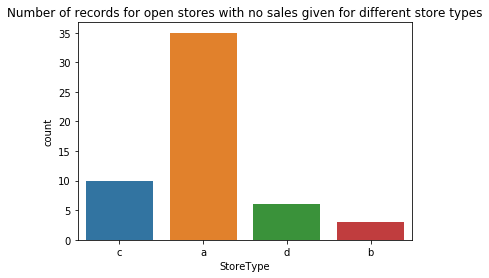

In [59]:
ax = sns.countplot(x='StoreType', data=df_train_store_combined_no_sales_closed)
ax.set_title('Number of records for open stores with no sales given for different store types')
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

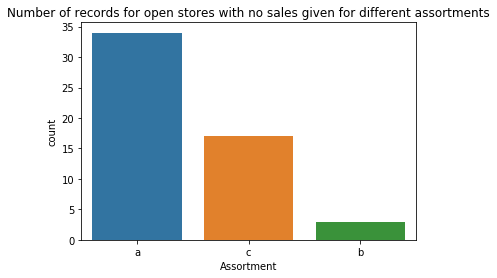

In [60]:
ax = sns.countplot(x='Assortment', data=df_train_store_combined_no_sales_closed)
ax.set_title('Number of records for open stores with no sales given for different assortments')
plt.plot

Most of the store types when store is closed and no sales is from store type a and most of the data belongs to assortment a

## Further investigation of target column 

In [61]:
df_train_store_combined.head()

Store DayOfWeek       Date  Sales  Customers Open Promo StateHoliday  \
0     1         5 2015-07-31   5263        555    1     1            0   
1     1         4 2015-07-30   5020        546    1     1            0   
2     1         3 2015-07-29   4782        523    1     1            0   
3     1         2 2015-07-28   5011        560    1     1            0   
4     1         1 2015-07-27   6102        612    1     1            0   

  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0             1         c          a               1270.0   
1             1         c          a               1270.0   
2             1         c          a               1270.0   
3             1         c          a               1270.0   
4             1         c          a               1270.0   

  CompetitionOpenSinceMonth CompetitionOpenSinceYear Promo2 Promo2SinceWeek  \
0                         9               2008-01-01      0             NaN   
1                         9               2008-01-01      0             NaN   
2                         9               2008-01-01      0             NaN   
3                         9               2008-01-01      0             NaN   
4                         9               2008-01-01      0             NaN   

  Promo2SinceYear PromoInterval  
0             NaT           NaN  
1             NaT           NaN  
2             NaT           NaN  
3             NaT           NaN  
4             NaT           NaN

In [62]:
df_train_store_combined['Year'] = df_train_store_combined['Date'].dt.year.astype('object')
df_train_store_combined['Month'] = df_train_store_combined['Date'].dt.month.astype('object')
df_train_store_combined['Day'] = df_train_store_combined['Date'].dt.day.astype('object')

In [63]:
df_train_store_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
Store                        1017209 non-null object
DayOfWeek                    1017209 non-null object
Date                         1017209 non-null datetime64[ns]
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null object
Promo                        1017209 non-null object
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null object
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null object
CompetitionOpenSinceYear     693861 non-null datetime64[ns]
Promo2                       1017209 non-null object
Promo2SinceWeek              509178 non-null object
Promo2SinceYear            

In [64]:
df_train_store_combined[['Year', 'Month', 'Day']].describe()

Year    Month      Day
count   1017209  1017209  1017209
unique        3       12       31
top        2013        5       16
freq     406974   103695    33485

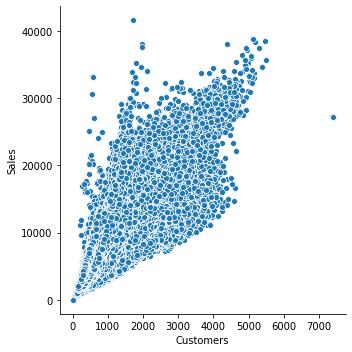

In [65]:
sns.relplot(x="Customers", y="Sales", data=df_train_store_combined)


looks like a positive correlation between customers and sales

/home/timbo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


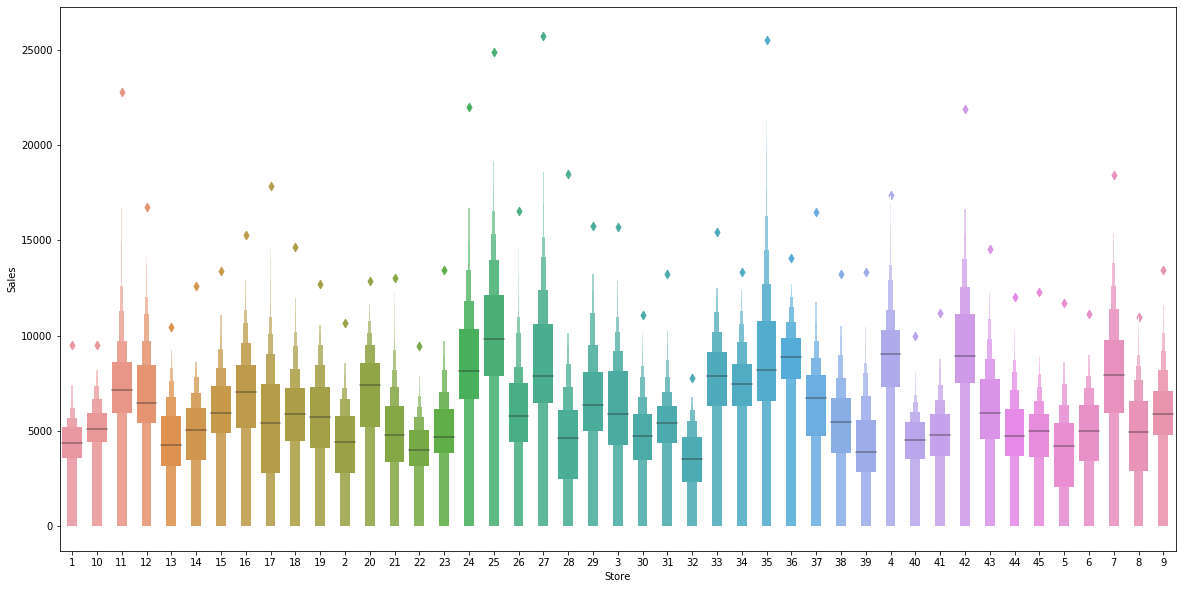

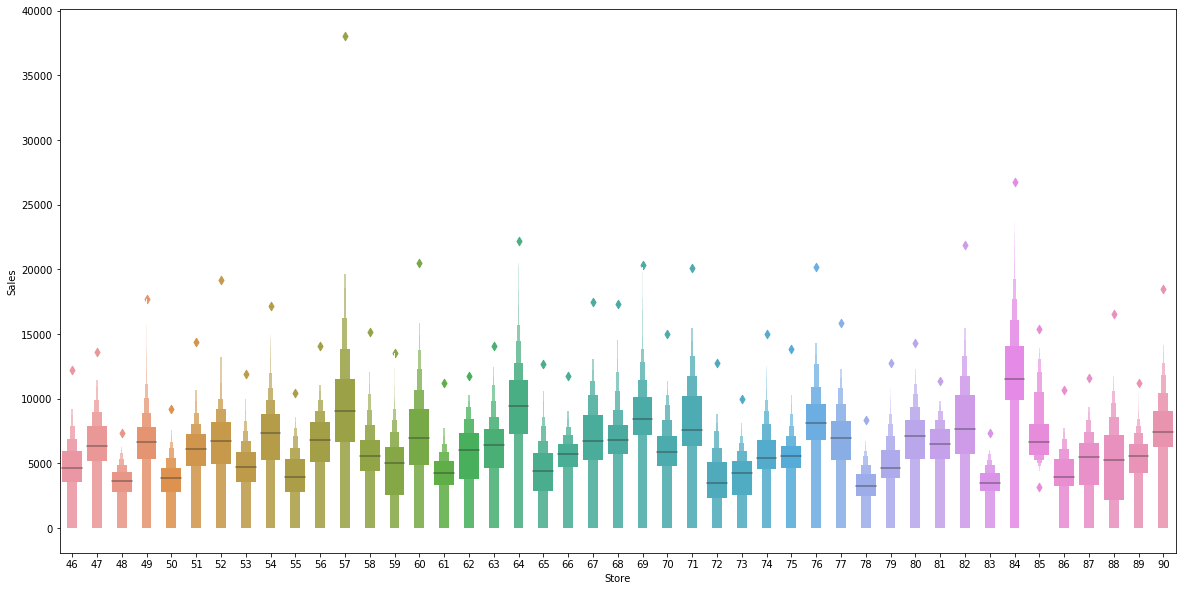

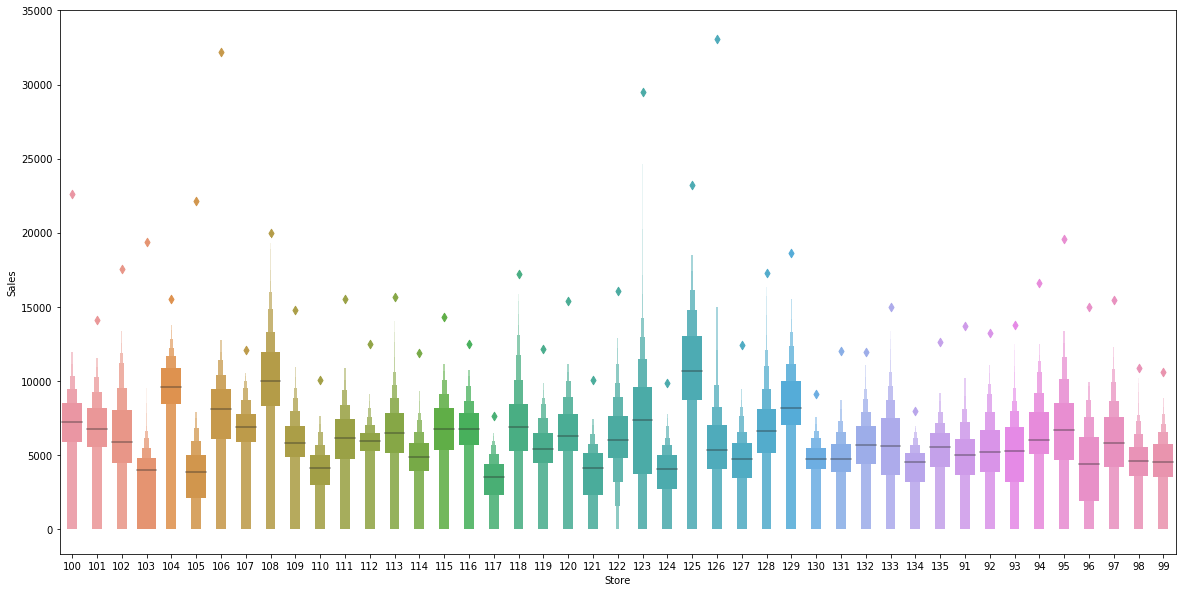

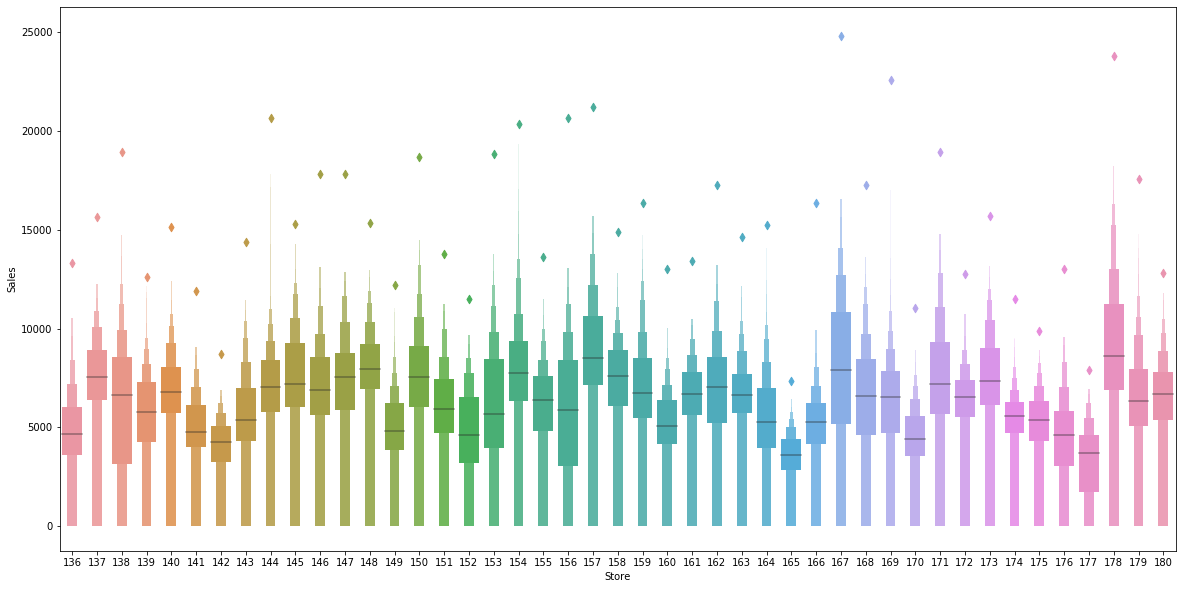

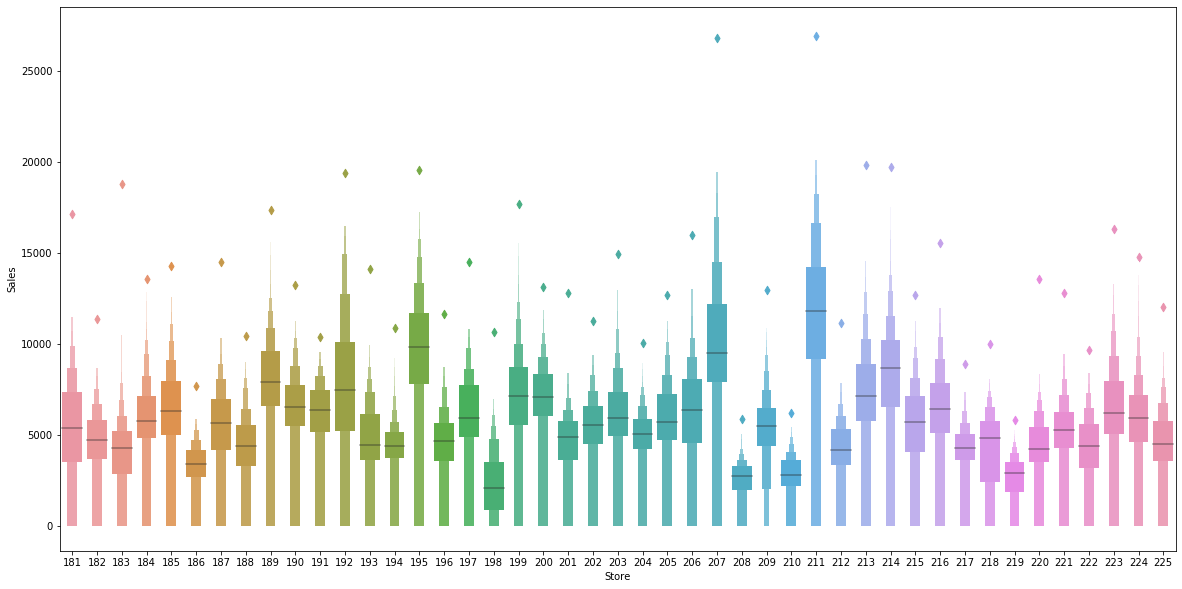

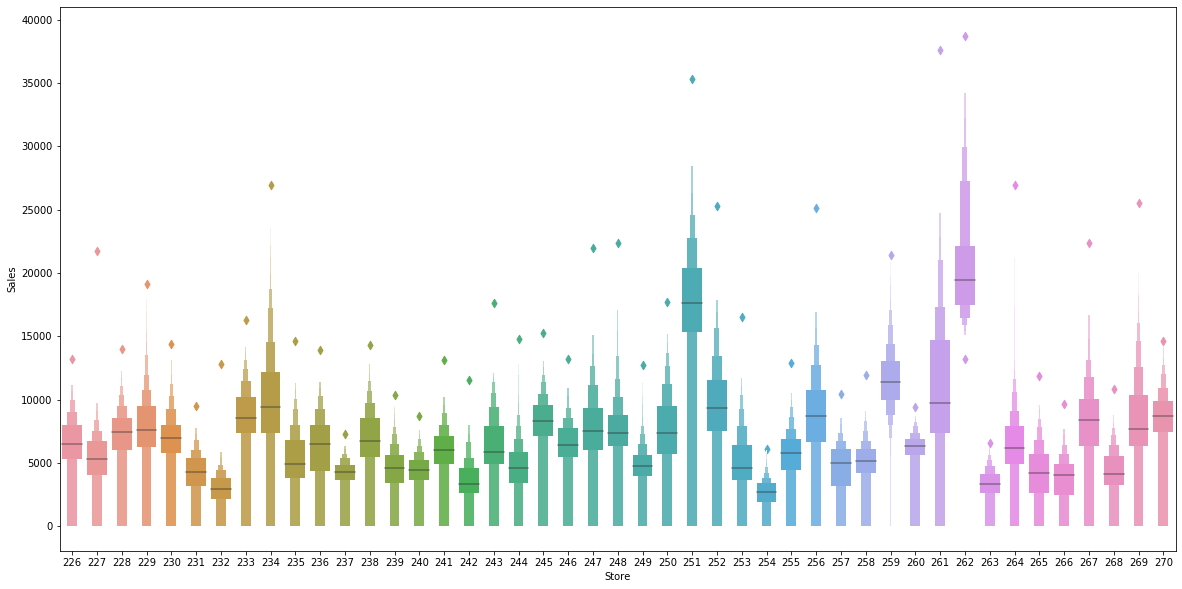

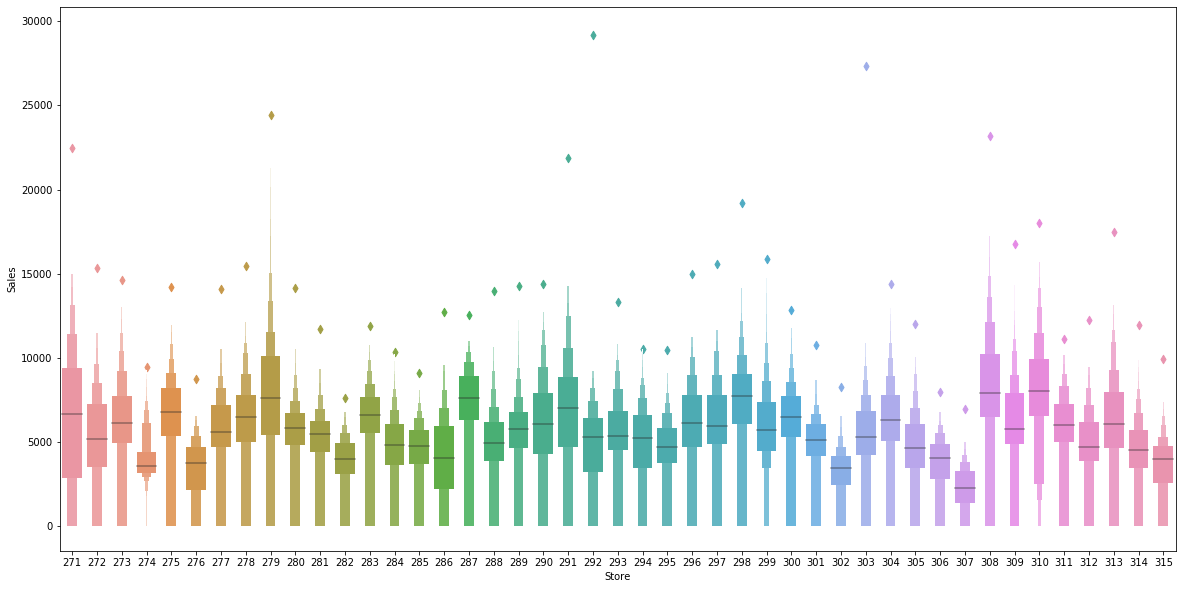

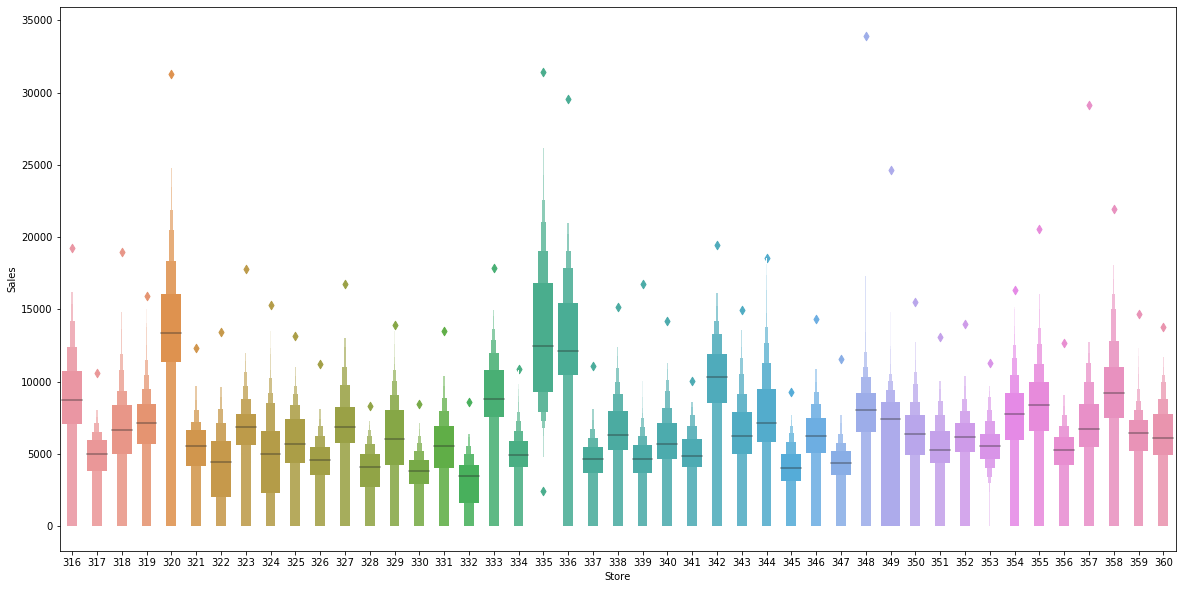

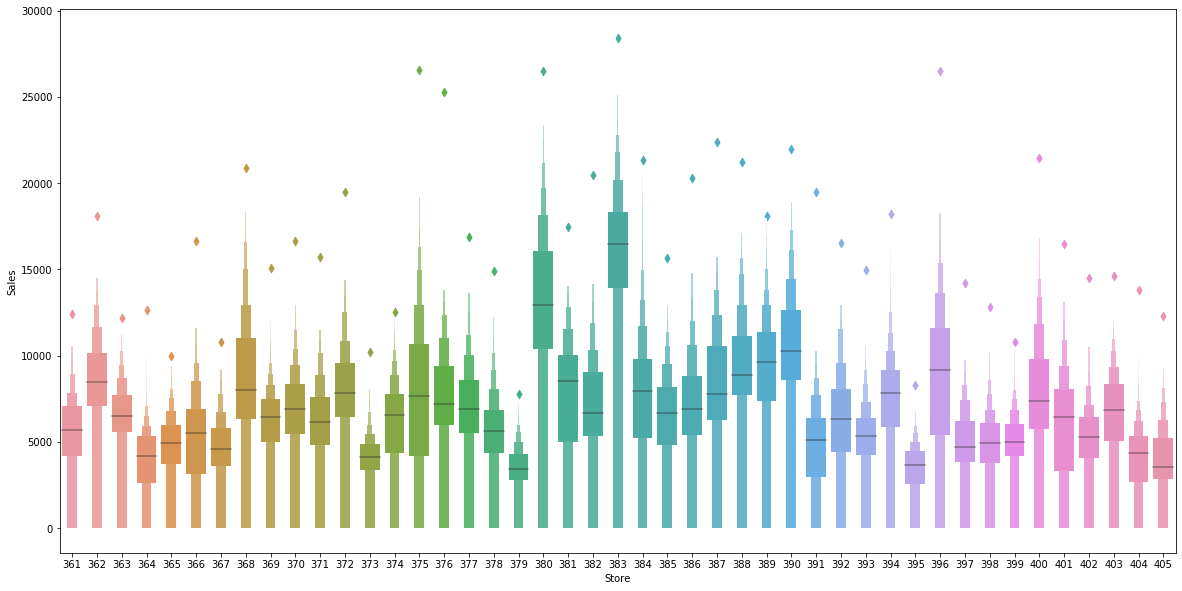

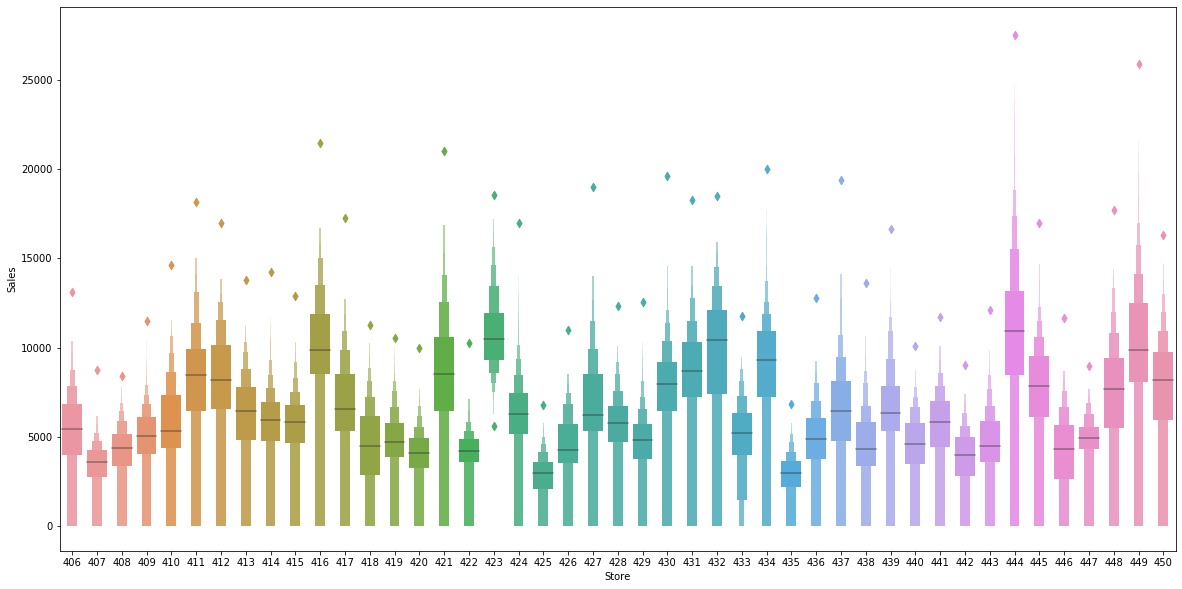

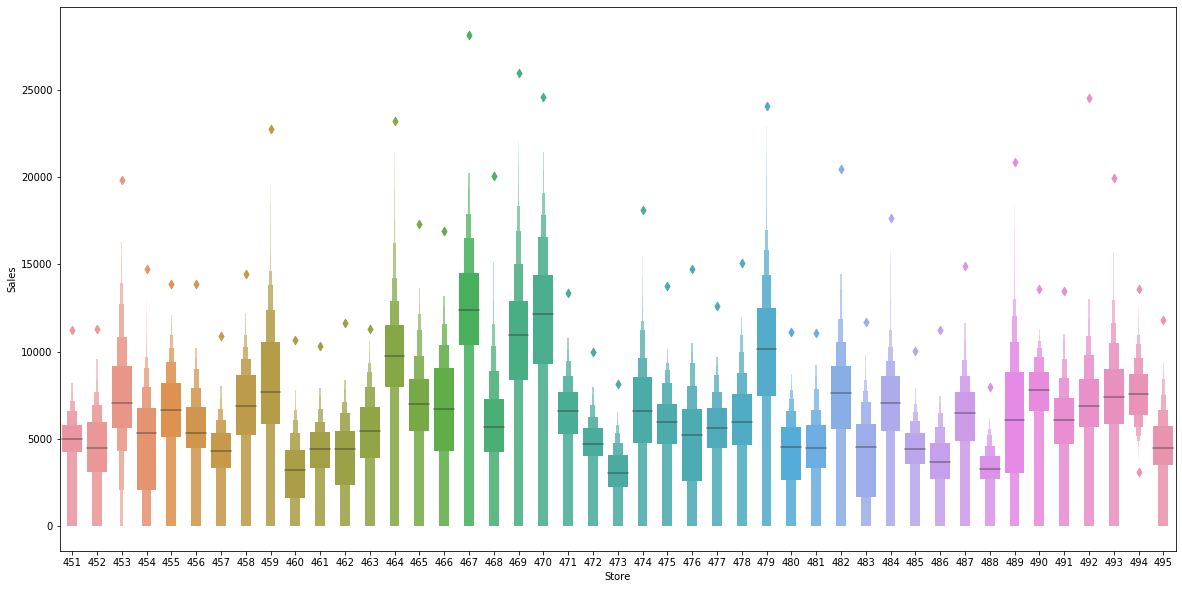

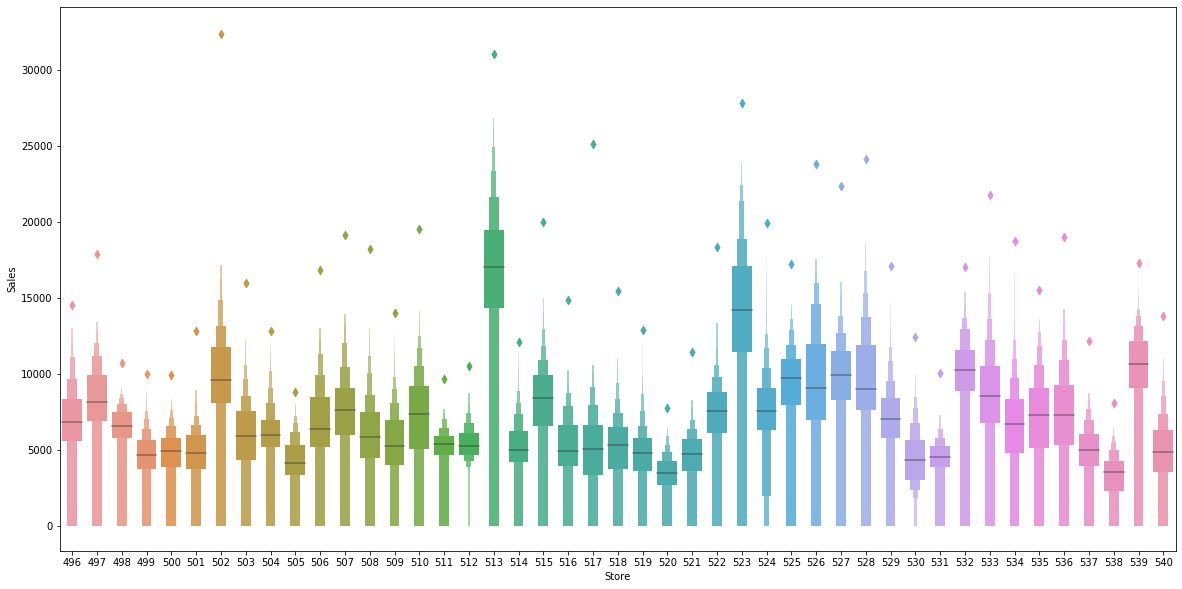

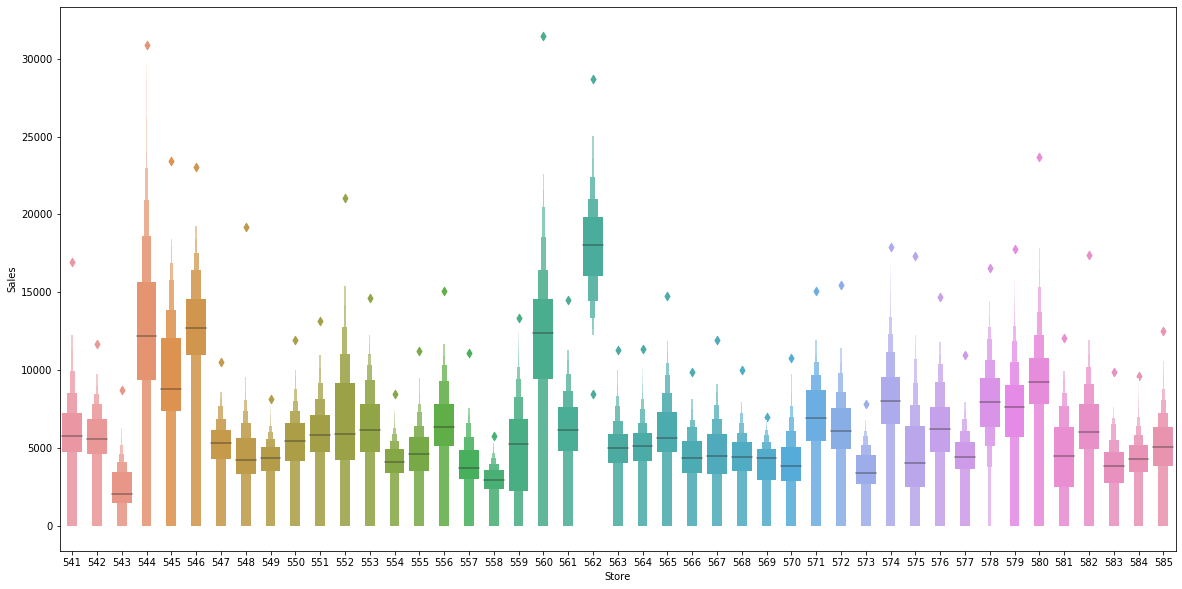

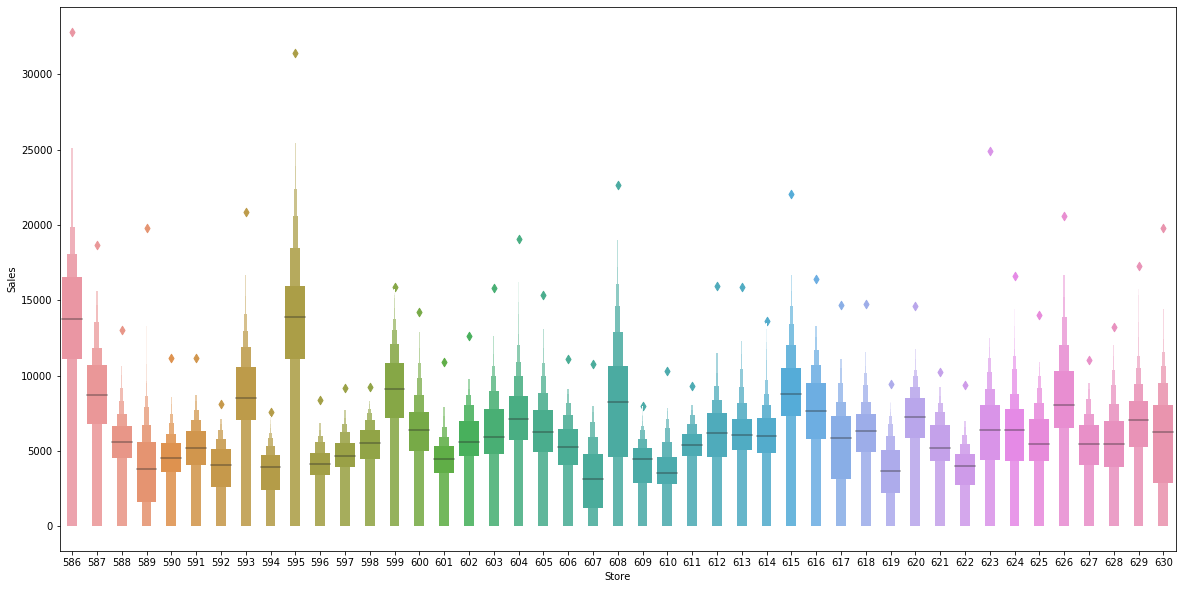

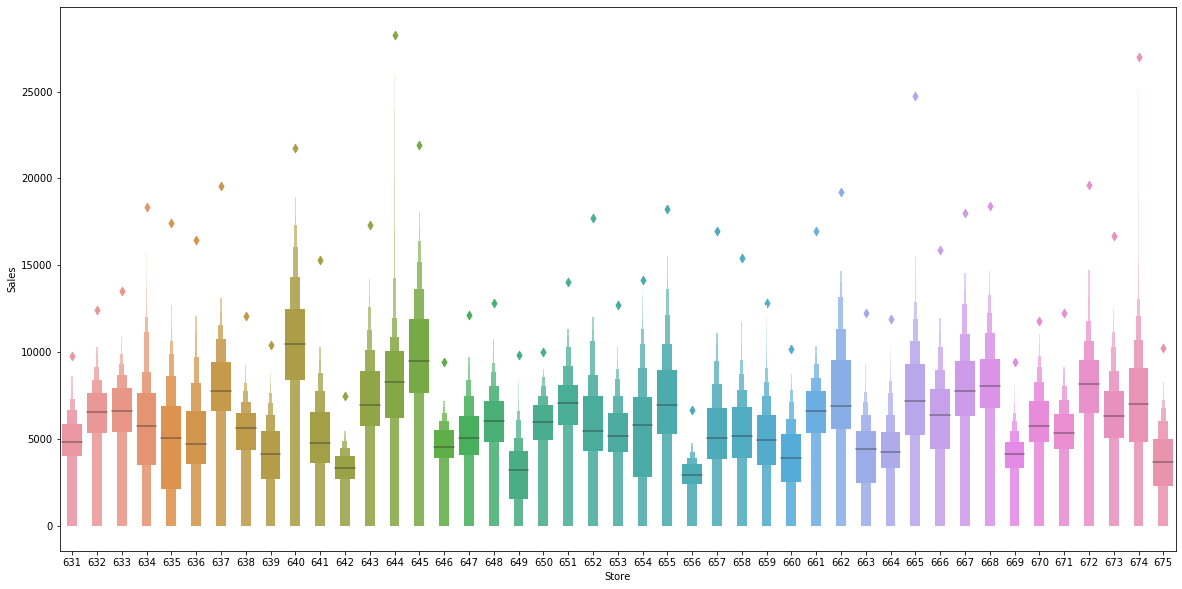

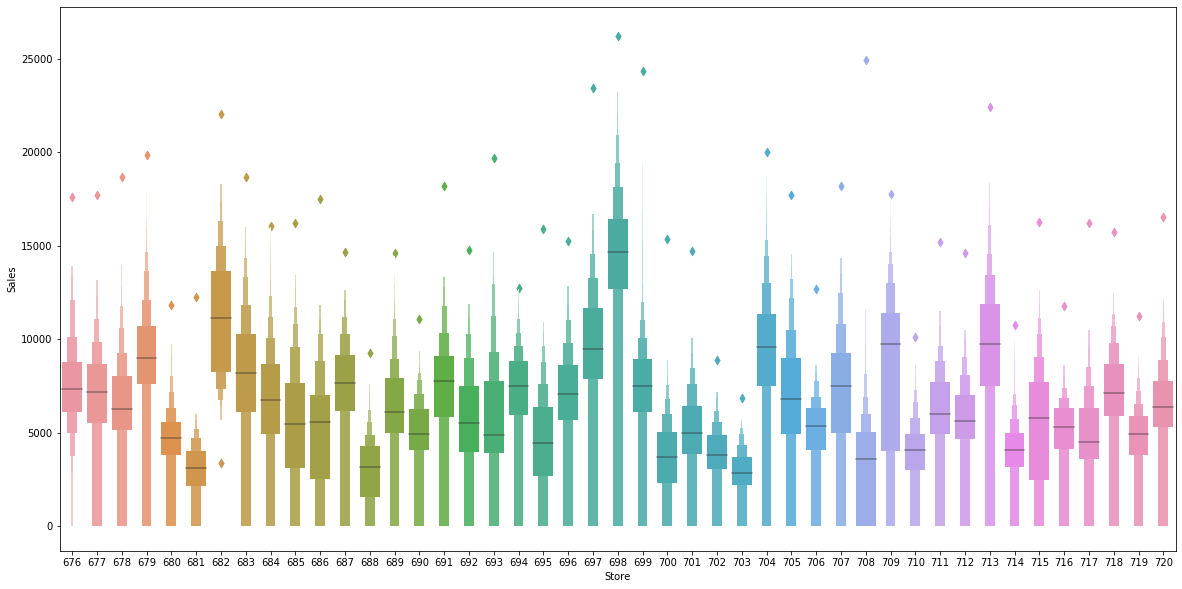

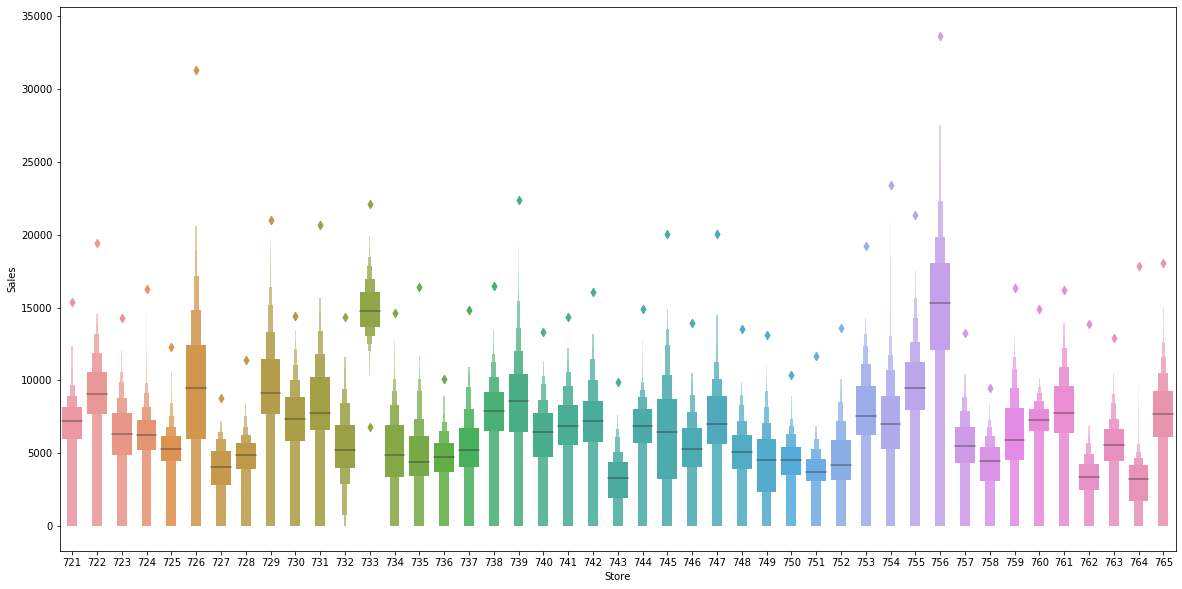

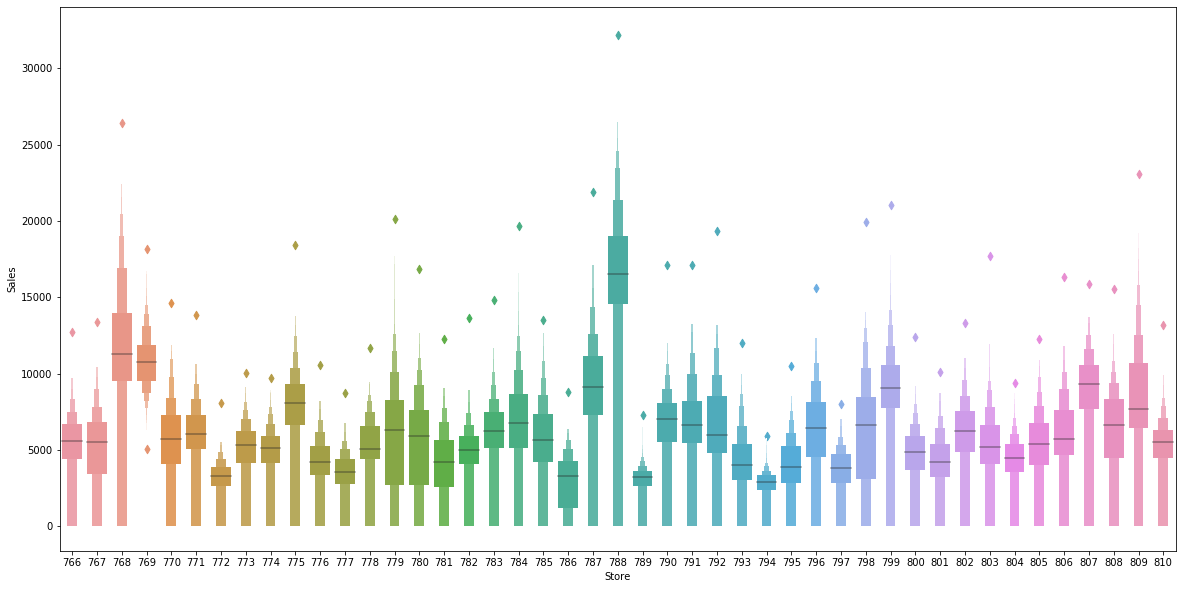

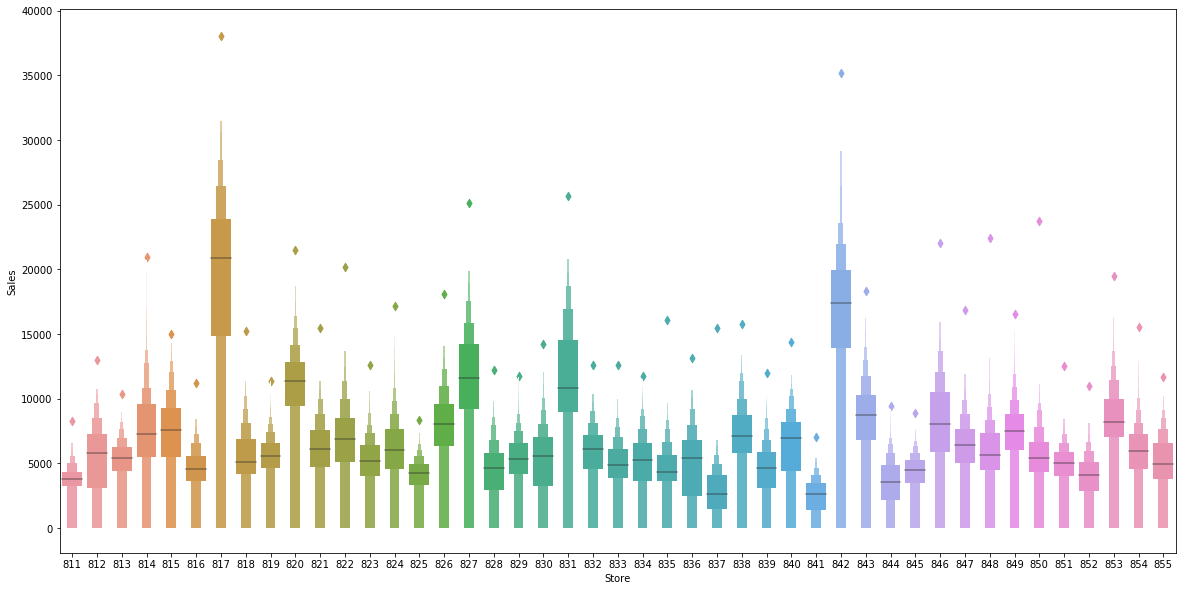

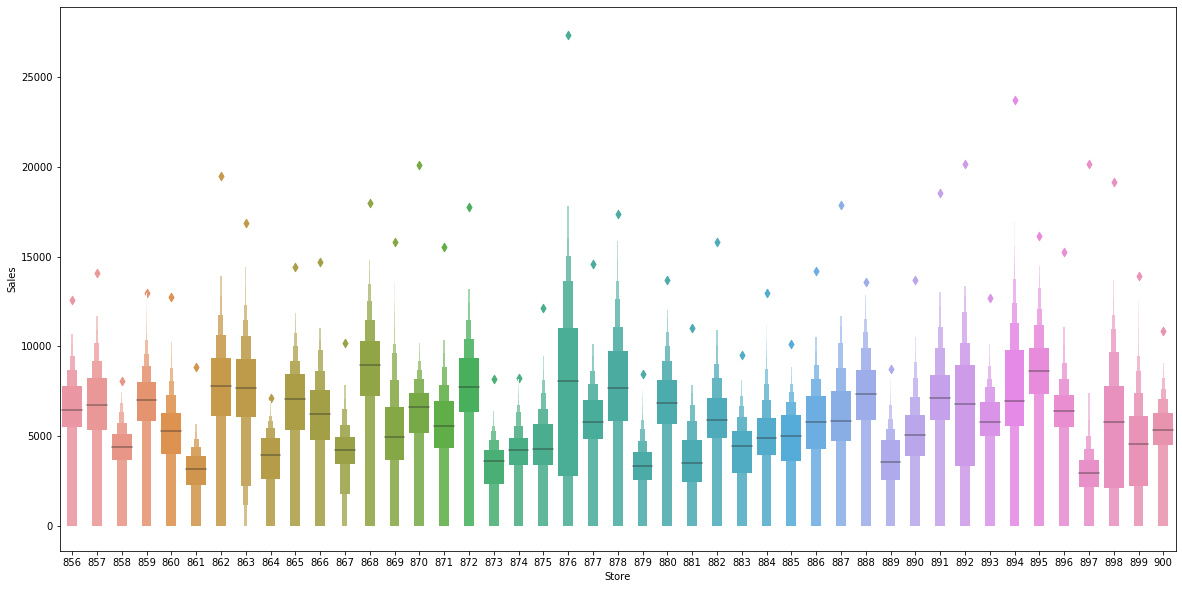

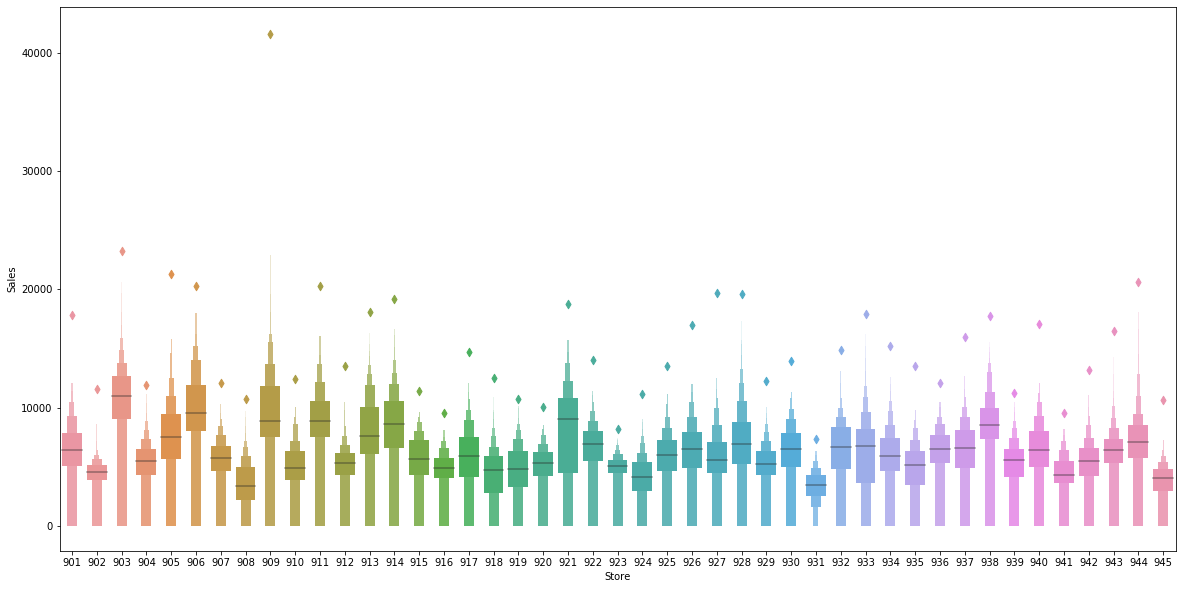

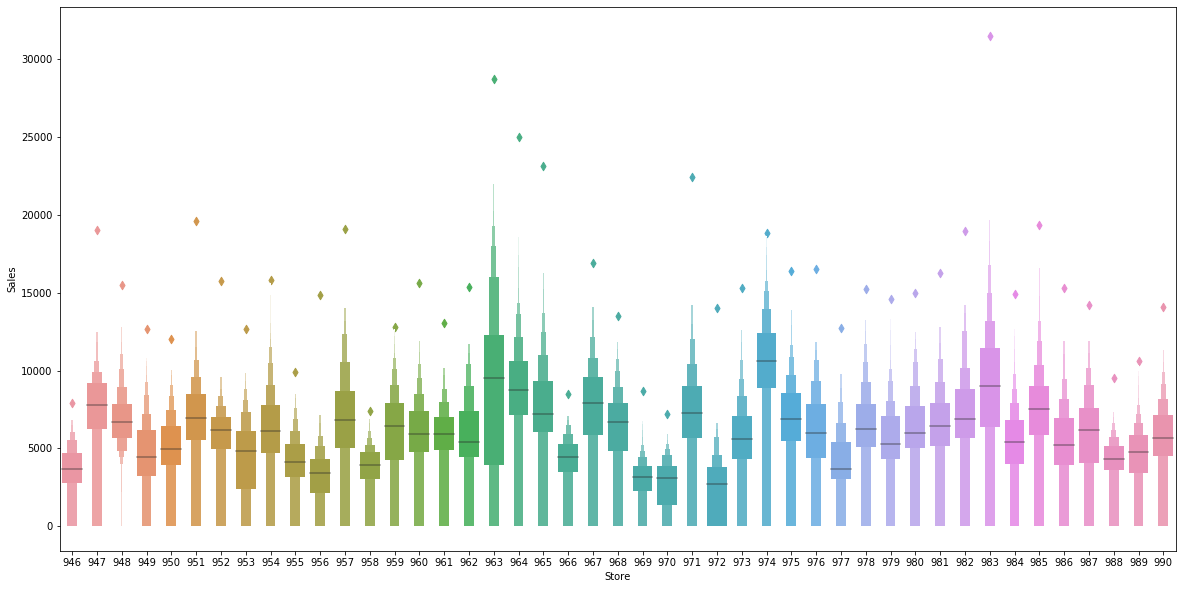

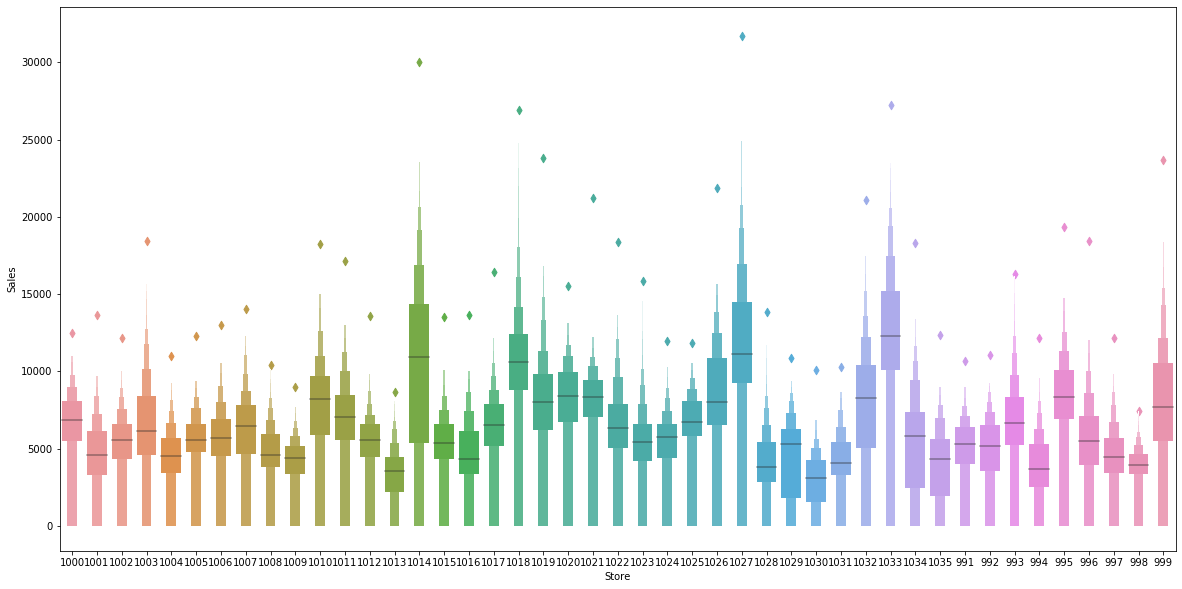

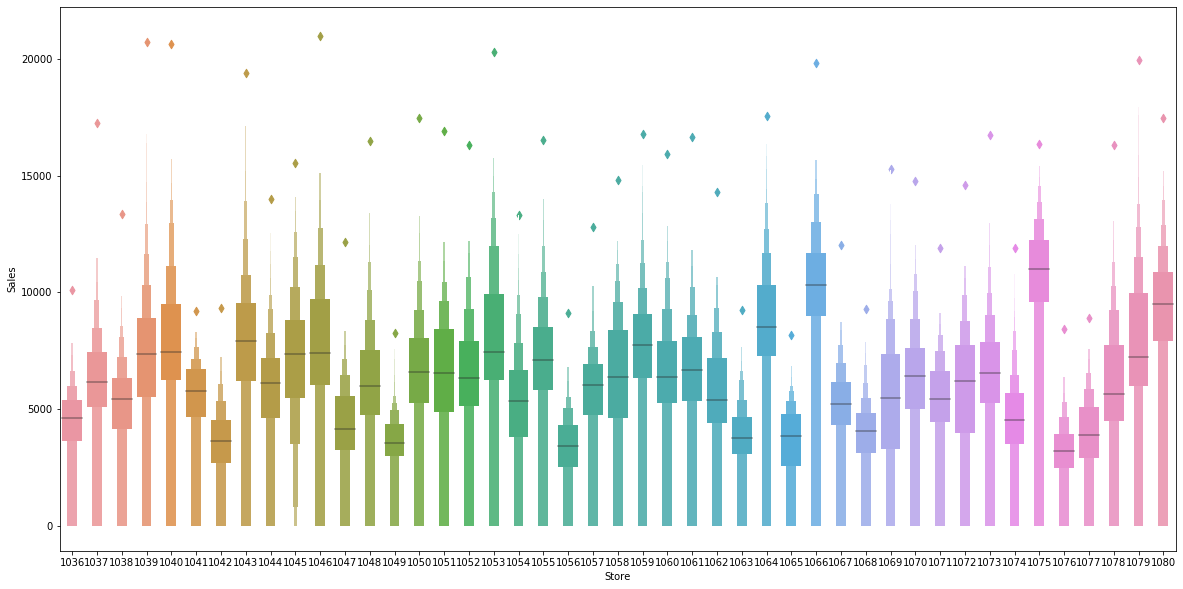

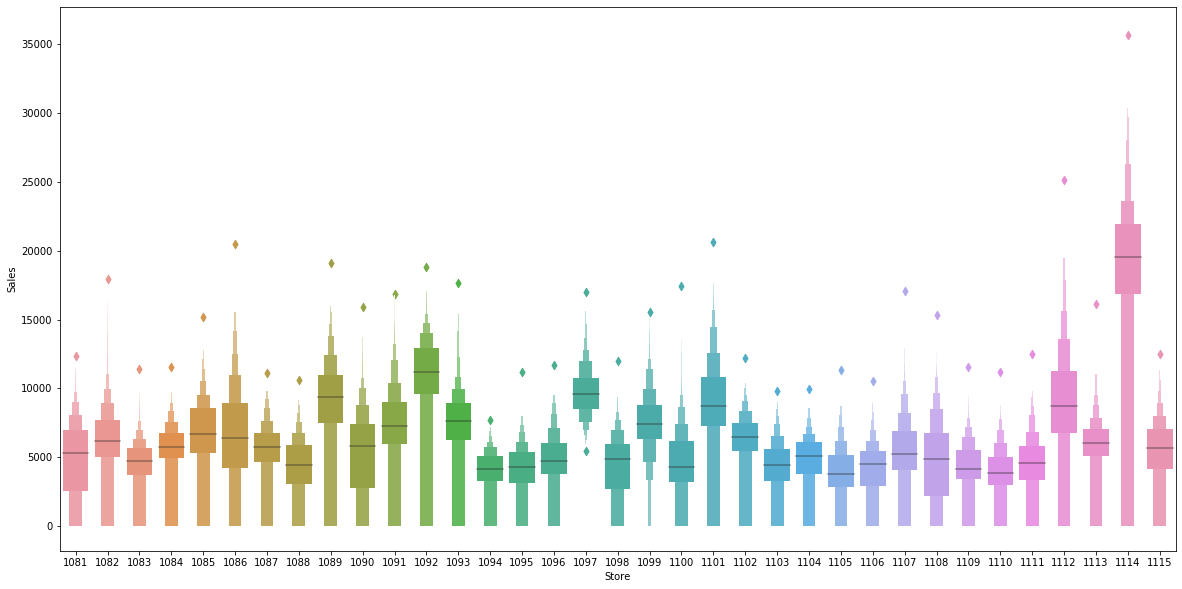

In [83]:
stores = df_train_store_combined['Store'].unique().tolist()
start = 0
steps = 45

i= 0
while start < len(stores):
    df = df_train_store_combined[df_train_store_combined['Store'].isin(stores[start:start+steps])]
    plt.figure(i,figsize=(20, 10))
    sns.boxenplot(x='Store', y='Sales', data=df)
    # print(df)
    start += steps
    i += 1
plt.show()

In [68]:
df_train_store_combined.groupby('Date')['Sales'].agg(['count','mean','median',pd.Series.mode,'max']).reset_index()

Date  count         mean  median  \
0   2013-01-01   1114    87.284560       0   
1   2013-01-02   1115  6233.030493    5737   
2   2013-01-03   1115  5693.112108    5292   
3   2013-01-04   1115  5954.218834    5623   
4   2013-01-05   1115  5337.751570    5018   
..         ...    ...          ...     ...   
937 2015-07-27   1115  9602.952466    9125   
938 2015-07-28   1115  8174.953363    7760   
939 2015-07-29   1115  7623.284305    7193   
940 2015-07-30   1115  7891.348879    7523   
941 2015-07-31   1115  9067.033184    8568   

                                                  mode    max  
0                                                    0  17267  
1                                                 6676  25357  
2                                                    0  23303  
3                                                    0  21996  
4                                                    0  22521  
..                                                 ...    ...  
937  [0, 4638, 5925, 6045, 6211, 6431, 6805, 6856, ...  27881  
938                           [7506, 7533, 8352, 9263]  25518  
939                                       [5551, 7361]  25840  
940                                               7648  24395  
941                               [9654, 10130, 10141]  27508  

[942 rows x 6 columns]

In [69]:
df_mean_sales_per_date = df_train_store_combined.groupby('Date')['Sales'].agg(['mean']).reset_index()

/home/timbo/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


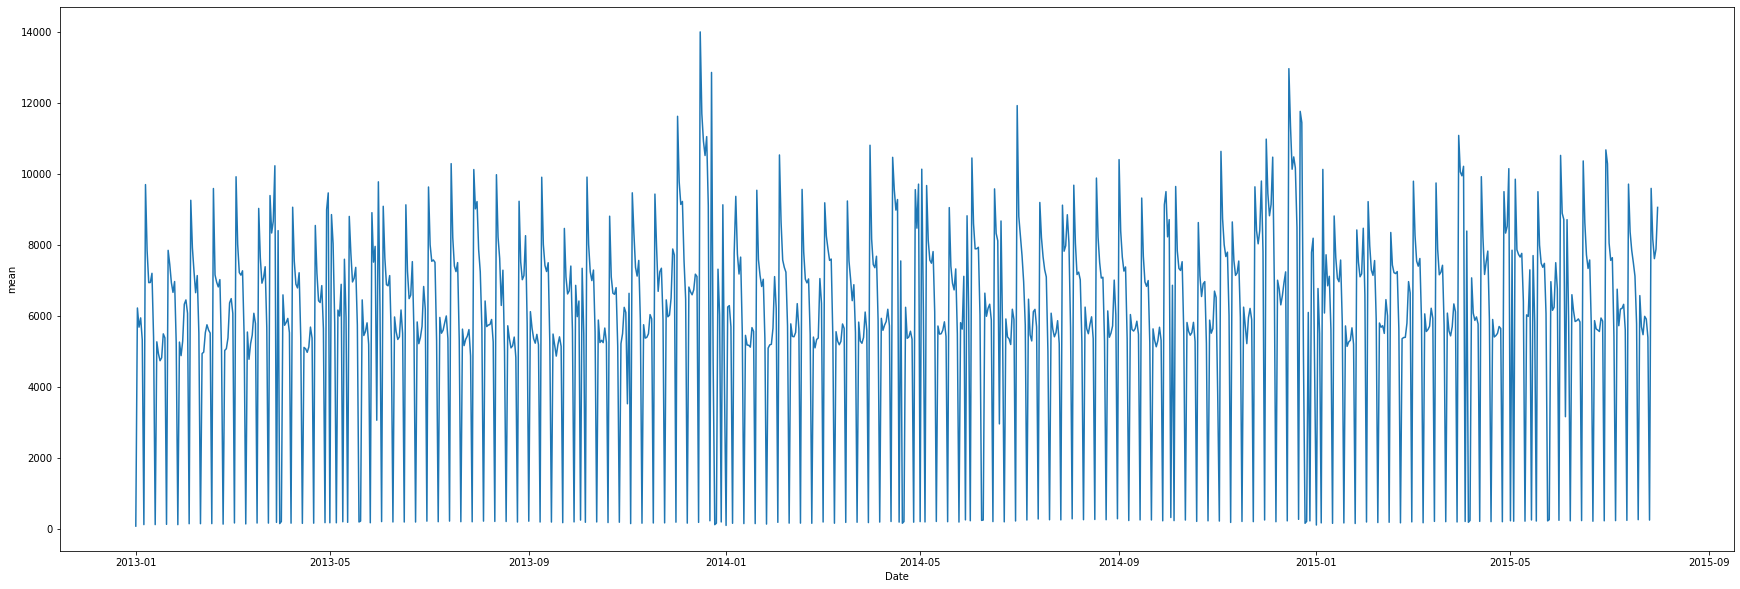

In [70]:
plt.figure(figsize=(30,10))
ax =  sns.lineplot(x='Date', y= 'mean',data=df_mean_sales_per_date)


The highest average sales are in december (christmas).But during the summer time the average sales are also high.

In [71]:
df_average_sales_per_month_year = df_train_store_combined.groupby(['Year','Month'])['Sales'].agg('mean').dropna().reset_index()

In [72]:
df_average_sales_per_month_year

Year  Month        Sales
0   2013      1  5211.555578
1   2013      2  5494.371397
2   2013      3  5820.349168
3   2013      4  5483.749836
4   2013      5  5364.127383
5   2013      6  5402.162960
6   2013      7  6042.062260
7   2013      8  5729.574049
8   2013      9  5322.988430
9   2013     10  5429.258788
10  2013     11  5864.601614
11  2013     12  6703.618140
12  2014      1  5431.875799
13  2014      2  5731.091512
14  2014      3  5584.257312
15  2014      4  5815.993333
16  2014      5  5632.670534
17  2014      6  5681.526188
18  2014      7  5999.403381
19  2014      8  5649.421252
20  2014      9  5865.104029
21  2014     10  5665.564878
22  2014     11  6179.249661
23  2014     12  6973.282456
24  2015      1  5752.747866
25  2015      2  5710.296541
26  2015      3  5949.130132
27  2015      4  5916.857578
28  2015      5  5472.122002
29  2015      6  6199.203976
30  2015      7  6142.705511

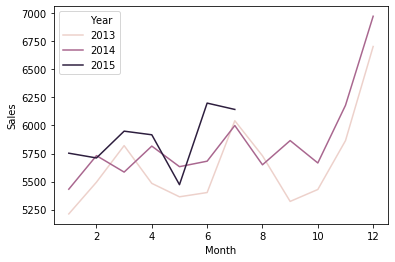

In [73]:
sns.lineplot(x='Month',y='Sales',hue='Year', data=df_average_sales_per_month_year, legend='full')

There is a positive trend on averages sales over the years.

In [74]:
df_average_sales_per_day_month_year = df_train_store_combined.groupby(['Year','Month','Day'])['Sales'].agg('mean').dropna().reset_index()

In [75]:
df_average_sales_per_day_month_year

Year  Month  Day        Sales
0    2013      1    1    87.284560
1    2013      1    2  6233.030493
2    2013      1    3  5693.112108
3    2013      1    4  5954.218834
4    2013      1    5  5337.751570
..    ...    ...  ...          ...
937  2015      7   27  9602.952466
938  2015      7   28  8174.953363
939  2015      7   29  7623.284305
940  2015      7   30  7891.348879
941  2015      7   31  9067.033184

[942 rows x 4 columns]

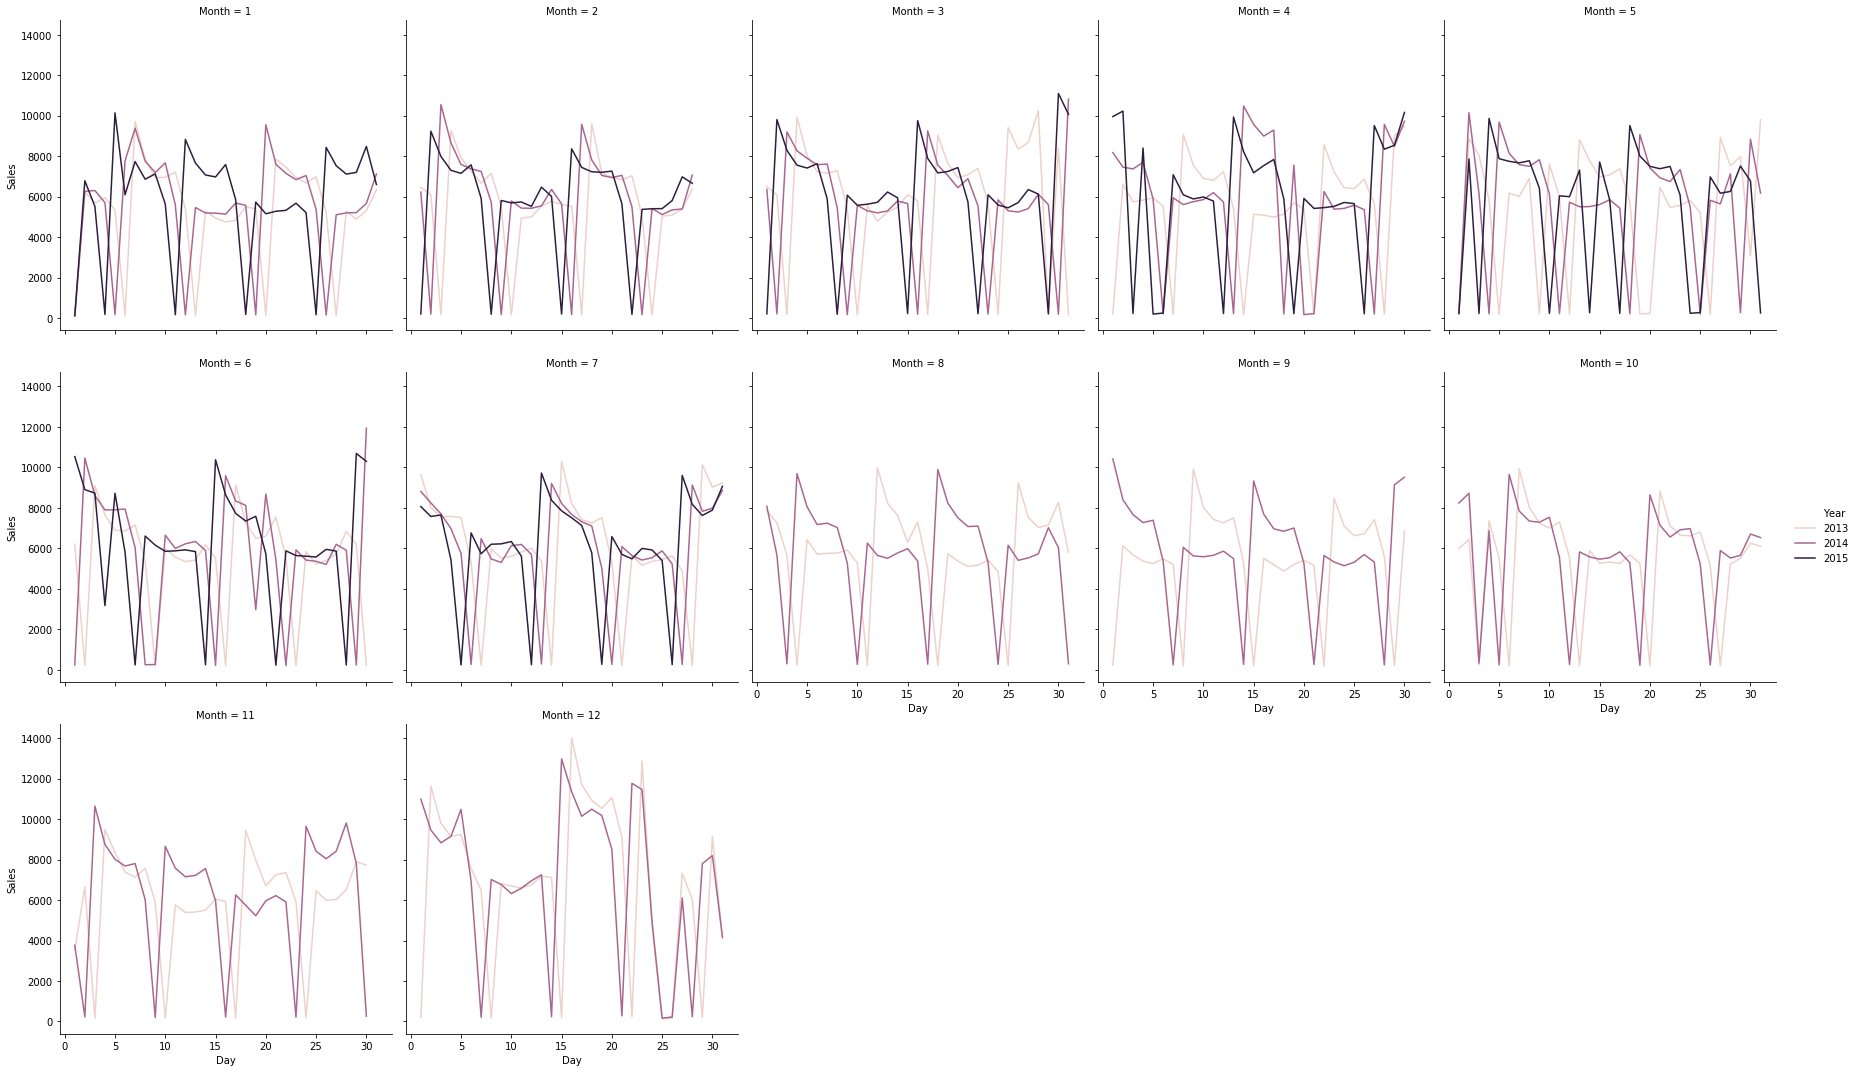

In [76]:
sns.relplot(x='Day',y='Sales',hue='Year',col='Month',data=df_average_sales_per_day_month_year,kind='line',legend='full',col_wrap=5)

In [77]:
df_average_sales_per_dayOfWeek_month_year = df_train_store_combined.groupby(['Year','Month','DayOfWeek'])['Sales'].agg('mean').dropna().reset_index()

In [78]:
df_average_sales_per_dayOfWeek_month_year

Year  Month DayOfWeek        Sales
0    2013      1         1  7029.913004
1    2013      1         2  5047.043416
2    2013      1         3  6035.120000
3    2013      1         4  6097.627265
4    2013      1         5  6411.672422
..    ...    ...       ...          ...
212  2015      7         3  7044.266188
213  2015      7         4  7039.330942
214  2015      7         5  7220.753543
215  2015      7         6  5557.611211
216  2015      7         7   253.492825

[217 rows x 4 columns]

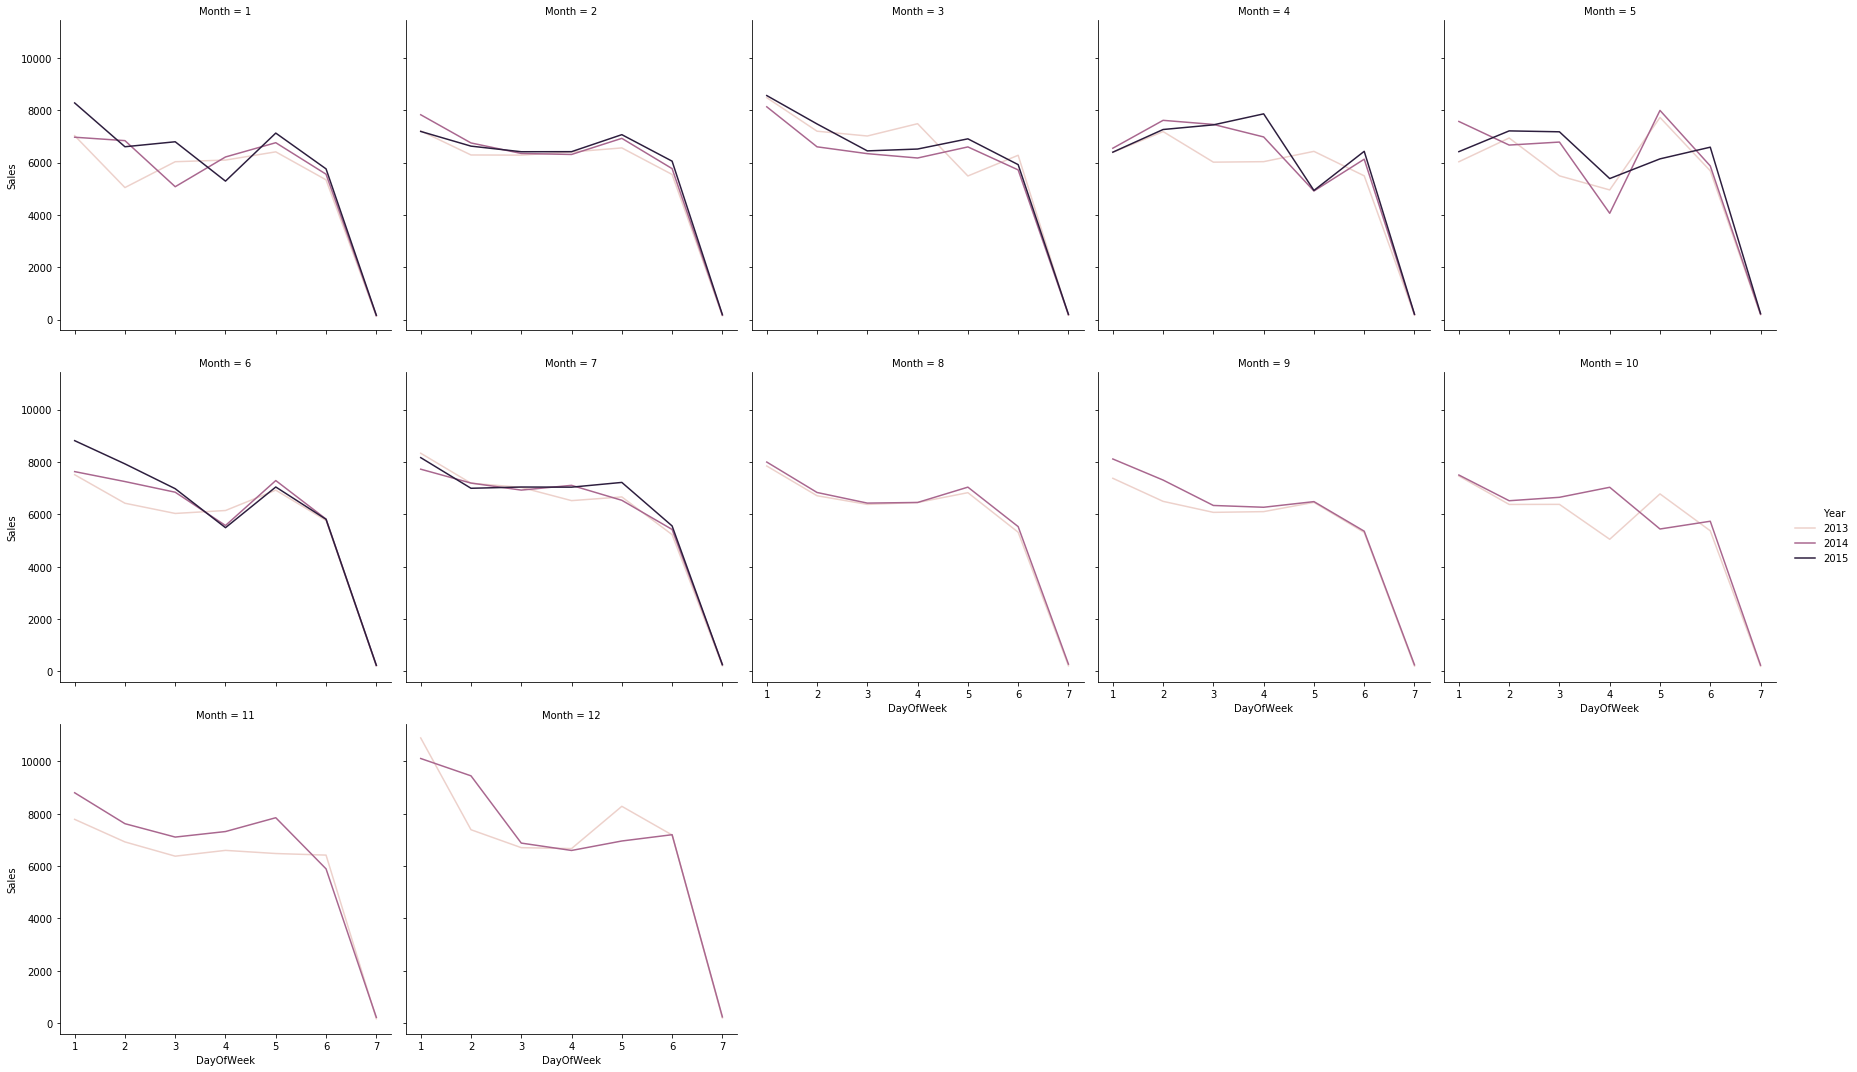

In [79]:
sns.relplot(x='DayOfWeek',y='Sales',hue='Year',col='Month',data=df_average_sales_per_dayOfWeek_month_year,kind='line',legend='full',col_wrap=5)

In most month the highest average sales are at the beginng and at the end of the working work

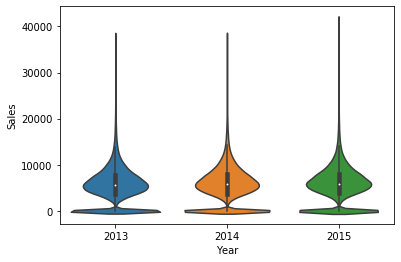

In [80]:
sns.violinplot(x="Year", y="Sales", data=df_train_store_combined)

In [81]:
df_train_store_combined.groupby('Year')['Sales'].agg(['count','mean','median',pd.Series.mode,'max'])

count         mean  median  mode    max
Year                                          
2013  406974  5658.533675    5598     0  38025
2014  373855  5833.290704    5794     0  38037
2015  236380  5878.245380    5916     0  41551

In the year 2015 there are higher sales but the distribution looks more or less the same but there is the most data available for the year 2013. No sales is for every year the mode.